## Importação das bibliotecas para EDA
Na célula abaixo sao importadas as principais bibliotecas utilizadas para fazer leitura e exploração do conjunto de dados Iris, disponível no link: [https://archive.ics.uci.edu/ml/datasets/Iris](https://archive.ics.uci.edu/ml/datasets/Iris)

In [4]:
import pandas as pd
import numpy as np; np.random.seed(42);
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Na célula abaixo é carregado o conjunto de dados como um dataframe e adicionado o nome das colunas.

In [5]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('data/iris.data', header=None, names=columns)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Na célula abaixo é cria mostrada a matriz de correlação dos atributos.

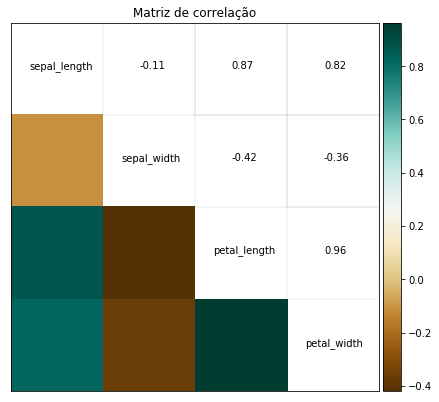

In [7]:
fig, ax = plt.subplots(figsize=(7, 7))
cm = df.iloc[:, :4].corr()

mask = np.tri(cm.shape[0], k=0).T
cm = np.ma.array(cm, mask=mask)
im = ax.imshow(cm, interpolation='nearest', cmap='BrBG')
# plt.xticks(np.arange(4), df.columns[:-1].to_list(), rotation=45)
# plt.yticks(np.arange(4), df.columns[:-1].to_list(), rotation=45)
plt.yticks([]); plt.xticks([]);
plt.title('Matriz de correlação')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

for i in range(4):
    for j in range(4):
        if i == j:
            ax.text(j-.3, i, df.columns[j])
        if j>i:
            ax.text(j-.1, i, '%.2f'%cm[j][i])
            rec = plt.Rectangle((j-.5, i-.5), 1, 1, color="#0000000A", fill=False, linewidth=2)
            ax = ax or plt.gca()
            ax.add_patch(rec)
plt.savefig('results/correlation_matrix_iris.pdf', dpi=600, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

Na célula abaixo é mostrada a média de cada atributo para cada uma das classes do conjunto de dados

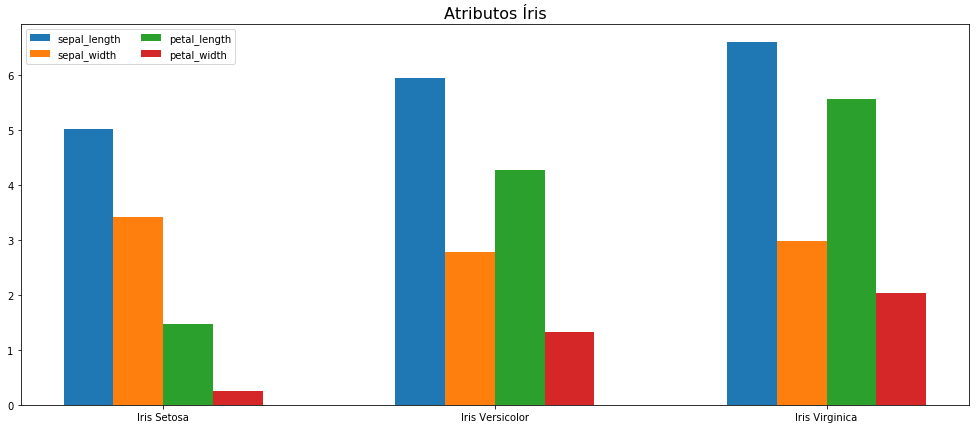

In [8]:
fig, ax = plt.subplots(figsize=(17, 7))
width = 0.15
labels = ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica']
attrs = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = np.arange(len(labels))

setosa = df[df["class"] == "Iris-setosa"]
versicolor = df[df["class"] == "Iris-versicolor"]
virginica = df[df["class"] == "Iris-virginica"]

for i, att in enumerate(attrs):
    y = [setosa[att].values.mean(), versicolor[att].values.mean(), 
         virginica[att].values.mean()]
    ax.bar(x-width/2, y, width, label=att)
    x = x+width

ax.set_xticks(x-(width*3))
ax.set_xticklabels(labels)
ax.set_title('Atributos Íris', fontdict=dict(size=16))
plt.legend(ncol=2)

plt.savefig('results/attributes_bar_iris.pdf', dpi=600, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

Na célula abaixa é criado o gráfico do tipo boxplot, mostrando a distribuição dos valores de cada atributo para cada uma das classes.

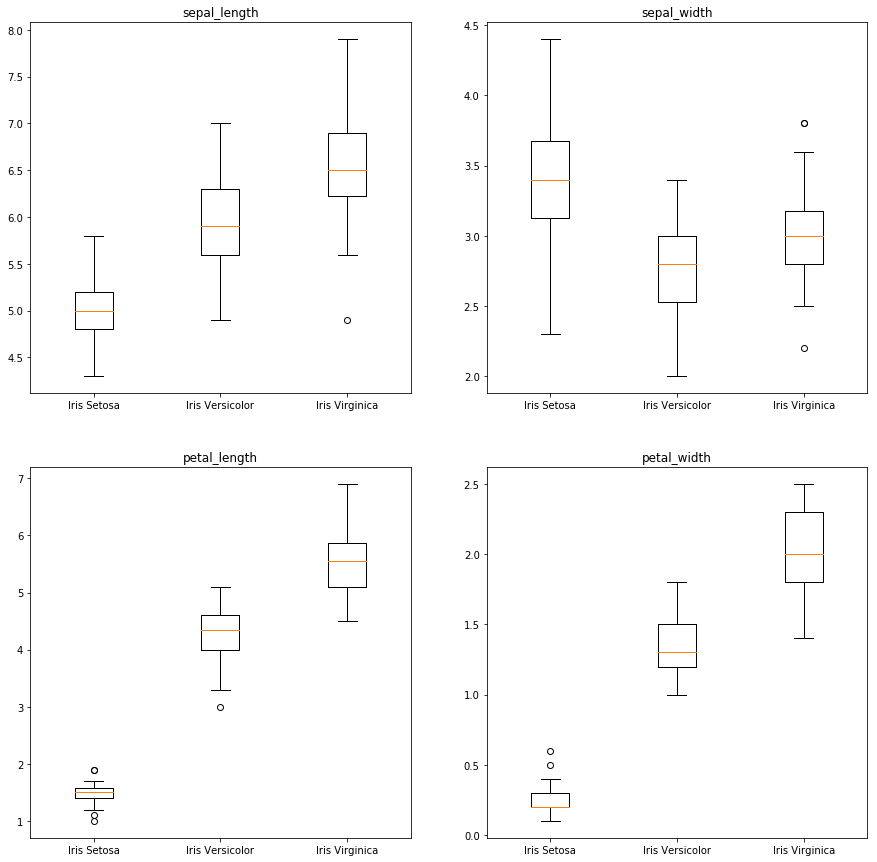

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
idx = 0
for i in range(2):
    for j in range(2):
        y = [setosa[attrs[idx]], versicolor[attrs[idx]], virginica[attrs[idx]]]
#         print(y)
        _ = ax[i][j].boxplot(y)
        _ = ax[i][j].set_xticklabels(labels)
        _ = ax[i][j].set_title(attrs[idx])
        idx+=1
plt.savefig('results/attributes_boxplot_iris.pdf', dpi=600, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

# Importação das biblioetecas do modelo

Foi utilizada a biblioteca [https://keras.io](https://keras.io) para criar a estrutura da rede MLP e a biblioteca [https://scikit-learn.org](https://scikit-learn.org) para o preprocessamento dos dados.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras import optimizers
from sklearn.metrics import confusion_matrix


X = df.iloc[:, :4].values
y = df.iloc[:, -1].values
le = LabelEncoder()
y = le.fit_transform(y)
y = np_utils.to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 2s 19ms/step - loss: 0.3961 - categorical_accuracy: 0.3250 - val_loss: 0.3553 - val_categorical_accuracy: 0.3667
Epoch 2/300
120/120 [==============================] - 0s 68us/step - loss: 0.3800 - categorical_accuracy: 0.3250 - val_loss: 0.3368 - val_categorical_accuracy: 0.3667
Epoch 3/300
120/120 [==============================] - 0s 70us/step - loss: 0.3589 - categorical_accuracy: 0.3250 - val_loss: 0.3158 - val_categorical_accuracy: 0.3667
Epoch 4/300
120/120 [==============================] - 0s 126us/step - loss: 0.3361 - categorical_accuracy: 0.3250 - val_loss: 0.2992 - val_categorical_accuracy: 0.3667
Epoch 5/300
120/120 [==============================] - 0s 139us/step - loss: 0.3185 - categorical_accuracy: 0.3250 - val_loss: 0.2891 - val_categorical_accuracy: 0.3667
Epoch 6/300
120/120 [==============================] - 0s 142us/step - loss: 0.3070 - categorical_accuracy: 0.325

120/120 [==============================] - 0s 127us/step - loss: 0.2106 - categorical_accuracy: 0.6583 - val_loss: 0.1934 - val_categorical_accuracy: 0.7000
Epoch 50/300
120/120 [==============================] - 0s 102us/step - loss: 0.2097 - categorical_accuracy: 0.6583 - val_loss: 0.1925 - val_categorical_accuracy: 0.7000
Epoch 51/300
120/120 [==============================] - 0s 140us/step - loss: 0.2087 - categorical_accuracy: 0.6583 - val_loss: 0.1917 - val_categorical_accuracy: 0.7000
Epoch 52/300
120/120 [==============================] - 0s 127us/step - loss: 0.2080 - categorical_accuracy: 0.6583 - val_loss: 0.1912 - val_categorical_accuracy: 0.7000
Epoch 53/300
120/120 [==============================] - 0s 125us/step - loss: 0.2073 - categorical_accuracy: 0.6583 - val_loss: 0.1902 - val_categorical_accuracy: 0.7000
Epoch 54/300
120/120 [==============================] - 0s 122us/step - loss: 0.2066 - categorical_accuracy: 0.6583 - val_loss: 0.1894 - val_categorical_accuracy: 

120/120 [==============================] - 0s 180us/step - loss: 0.1859 - categorical_accuracy: 0.6583 - val_loss: 0.1661 - val_categorical_accuracy: 0.7000
Epoch 146/300
120/120 [==============================] - 0s 153us/step - loss: 0.1859 - categorical_accuracy: 0.6583 - val_loss: 0.1660 - val_categorical_accuracy: 0.7000
Epoch 147/300
120/120 [==============================] - 0s 153us/step - loss: 0.1858 - categorical_accuracy: 0.6583 - val_loss: 0.1659 - val_categorical_accuracy: 0.7000
Epoch 148/300
120/120 [==============================] - 0s 136us/step - loss: 0.1857 - categorical_accuracy: 0.6583 - val_loss: 0.1659 - val_categorical_accuracy: 0.7000
Epoch 149/300
120/120 [==============================] - 0s 129us/step - loss: 0.1856 - categorical_accuracy: 0.6583 - val_loss: 0.1658 - val_categorical_accuracy: 0.7000
Epoch 150/300
120/120 [==============================] - 0s 137us/step - loss: 0.1856 - categorical_accuracy: 0.6583 - val_loss: 0.1657 - val_categorical_accur

120/120 [==============================] - 0s 108us/step - loss: 0.1837 - categorical_accuracy: 0.6583 - val_loss: 0.1633 - val_categorical_accuracy: 0.7000
Epoch 194/300
120/120 [==============================] - 0s 105us/step - loss: 0.1837 - categorical_accuracy: 0.6583 - val_loss: 0.1632 - val_categorical_accuracy: 0.7000
Epoch 195/300
120/120 [==============================] - 0s 124us/step - loss: 0.1836 - categorical_accuracy: 0.6583 - val_loss: 0.1632 - val_categorical_accuracy: 0.7000
Epoch 196/300
120/120 [==============================] - 0s 116us/step - loss: 0.1835 - categorical_accuracy: 0.6583 - val_loss: 0.1632 - val_categorical_accuracy: 0.7000
Epoch 197/300
120/120 [==============================] - 0s 121us/step - loss: 0.1835 - categorical_accuracy: 0.6583 - val_loss: 0.1631 - val_categorical_accuracy: 0.7000
Epoch 198/300
120/120 [==============================] - 0s 100us/step - loss: 0.1835 - categorical_accuracy: 0.6583 - val_loss: 0.1631 - val_categorical_accur

Epoch 241/300
120/120 [==============================] - 0s 142us/step - loss: 0.1824 - categorical_accuracy: 0.6583 - val_loss: 0.1617 - val_categorical_accuracy: 0.7000
Epoch 242/300
120/120 [==============================] - 0s 112us/step - loss: 0.1823 - categorical_accuracy: 0.6583 - val_loss: 0.1616 - val_categorical_accuracy: 0.7000
Epoch 243/300
120/120 [==============================] - 0s 101us/step - loss: 0.1823 - categorical_accuracy: 0.6583 - val_loss: 0.1616 - val_categorical_accuracy: 0.7000
Epoch 244/300
120/120 [==============================] - 0s 82us/step - loss: 0.1823 - categorical_accuracy: 0.6583 - val_loss: 0.1616 - val_categorical_accuracy: 0.7000
Epoch 245/300
120/120 [==============================] - 0s 112us/step - loss: 0.1823 - categorical_accuracy: 0.6583 - val_loss: 0.1615 - val_categorical_accuracy: 0.7000
Epoch 246/300
120/120 [==============================] - 0s 122us/step - loss: 0.1822 - categorical_accuracy: 0.6583 - val_loss: 0.1615 - val_cate

Epoch 289/300
120/120 [==============================] - 0s 125us/step - loss: 0.1815 - categorical_accuracy: 0.6583 - val_loss: 0.1606 - val_categorical_accuracy: 0.7000
Epoch 290/300
120/120 [==============================] - 0s 147us/step - loss: 0.1815 - categorical_accuracy: 0.6583 - val_loss: 0.1606 - val_categorical_accuracy: 0.7000
Epoch 291/300
120/120 [==============================] - 0s 133us/step - loss: 0.1815 - categorical_accuracy: 0.6583 - val_loss: 0.1606 - val_categorical_accuracy: 0.7000
Epoch 292/300
120/120 [==============================] - 0s 101us/step - loss: 0.1815 - categorical_accuracy: 0.6583 - val_loss: 0.1605 - val_categorical_accuracy: 0.7000
Epoch 293/300
120/120 [==============================] - 0s 110us/step - loss: 0.1815 - categorical_accuracy: 0.6583 - val_loss: 0.1605 - val_categorical_accuracy: 0.7000
Epoch 294/300
120/120 [==============================] - 0s 93us/step - loss: 0.1815 - categorical_accuracy: 0.6583 - val_loss: 0.1605 - val_cate

Epoch 37/300
120/120 [==============================] - 0s 127us/step - loss: 0.1342 - categorical_accuracy: 0.6667 - val_loss: 0.1313 - val_categorical_accuracy: 0.7667
Epoch 38/300
120/120 [==============================] - 0s 151us/step - loss: 0.1328 - categorical_accuracy: 0.7500 - val_loss: 0.1302 - val_categorical_accuracy: 0.8000
Epoch 39/300
120/120 [==============================] - 0s 161us/step - loss: 0.1308 - categorical_accuracy: 0.7500 - val_loss: 0.1290 - val_categorical_accuracy: 0.8000
Epoch 40/300
120/120 [==============================] - 0s 176us/step - loss: 0.1295 - categorical_accuracy: 0.8417 - val_loss: 0.1266 - val_categorical_accuracy: 0.7333
Epoch 41/300
120/120 [==============================] - 0s 134us/step - loss: 0.1283 - categorical_accuracy: 0.6583 - val_loss: 0.1260 - val_categorical_accuracy: 0.8000
Epoch 42/300
120/120 [==============================] - 0s 138us/step - loss: 0.1272 - categorical_accuracy: 0.8833 - val_loss: 0.1242 - val_categoric

Epoch 133/300
120/120 [==============================] - 0s 176us/step - loss: 0.0877 - categorical_accuracy: 0.9583 - val_loss: 0.0903 - val_categorical_accuracy: 0.9667
Epoch 134/300
120/120 [==============================] - 0s 250us/step - loss: 0.0877 - categorical_accuracy: 0.9250 - val_loss: 0.0908 - val_categorical_accuracy: 0.9667
Epoch 135/300
120/120 [==============================] - 0s 150us/step - loss: 0.0880 - categorical_accuracy: 0.9583 - val_loss: 0.0899 - val_categorical_accuracy: 0.9667
Epoch 136/300
120/120 [==============================] - 0s 160us/step - loss: 0.0875 - categorical_accuracy: 0.9583 - val_loss: 0.0888 - val_categorical_accuracy: 0.9667
Epoch 137/300
120/120 [==============================] - 0s 162us/step - loss: 0.0884 - categorical_accuracy: 0.8583 - val_loss: 0.0910 - val_categorical_accuracy: 0.9667
Epoch 138/300
120/120 [==============================] - 0s 149us/step - loss: 0.0867 - categorical_accuracy: 0.9500 - val_loss: 0.0907 - val_cat

Epoch 181/300
120/120 [==============================] - 0s 128us/step - loss: 0.0772 - categorical_accuracy: 0.9583 - val_loss: 0.0811 - val_categorical_accuracy: 0.9667
Epoch 182/300
120/120 [==============================] - 0s 126us/step - loss: 0.0775 - categorical_accuracy: 0.9667 - val_loss: 0.0807 - val_categorical_accuracy: 0.9667
Epoch 183/300
120/120 [==============================] - 0s 135us/step - loss: 0.0772 - categorical_accuracy: 0.9583 - val_loss: 0.0800 - val_categorical_accuracy: 0.9667
Epoch 184/300
120/120 [==============================] - 0s 137us/step - loss: 0.0769 - categorical_accuracy: 0.9667 - val_loss: 0.0797 - val_categorical_accuracy: 0.9667
Epoch 185/300
120/120 [==============================] - 0s 122us/step - loss: 0.0765 - categorical_accuracy: 0.9583 - val_loss: 0.0796 - val_categorical_accuracy: 0.9667
Epoch 186/300
120/120 [==============================] - 0s 123us/step - loss: 0.0772 - categorical_accuracy: 0.9500 - val_loss: 0.0785 - val_cat

Epoch 229/300
120/120 [==============================] - 0s 118us/step - loss: 0.0700 - categorical_accuracy: 0.9667 - val_loss: 0.0724 - val_categorical_accuracy: 0.9667
Epoch 230/300
120/120 [==============================] - 0s 136us/step - loss: 0.0683 - categorical_accuracy: 0.9667 - val_loss: 0.0725 - val_categorical_accuracy: 0.9667
Epoch 231/300
120/120 [==============================] - 0s 141us/step - loss: 0.0689 - categorical_accuracy: 0.9667 - val_loss: 0.0724 - val_categorical_accuracy: 0.9667
Epoch 232/300
120/120 [==============================] - 0s 139us/step - loss: 0.0681 - categorical_accuracy: 0.9667 - val_loss: 0.0722 - val_categorical_accuracy: 0.9667
Epoch 233/300
120/120 [==============================] - 0s 111us/step - loss: 0.0679 - categorical_accuracy: 0.9750 - val_loss: 0.0722 - val_categorical_accuracy: 0.9667
Epoch 234/300
120/120 [==============================] - 0s 120us/step - loss: 0.0678 - categorical_accuracy: 0.9750 - val_loss: 0.0716 - val_cat

Epoch 277/300
120/120 [==============================] - 0s 104us/step - loss: 0.0614 - categorical_accuracy: 0.9750 - val_loss: 0.0641 - val_categorical_accuracy: 0.9667
Epoch 278/300
120/120 [==============================] - 0s 131us/step - loss: 0.0612 - categorical_accuracy: 0.9750 - val_loss: 0.0645 - val_categorical_accuracy: 0.9667
Epoch 279/300
120/120 [==============================] - 0s 128us/step - loss: 0.0614 - categorical_accuracy: 0.9833 - val_loss: 0.0647 - val_categorical_accuracy: 0.9667
Epoch 280/300
120/120 [==============================] - 0s 114us/step - loss: 0.0614 - categorical_accuracy: 0.9583 - val_loss: 0.0636 - val_categorical_accuracy: 0.9667
Epoch 281/300
120/120 [==============================] - 0s 111us/step - loss: 0.0608 - categorical_accuracy: 0.9667 - val_loss: 0.0642 - val_categorical_accuracy: 0.9667
Epoch 282/300
120/120 [==============================] - 0s 124us/step - loss: 0.0608 - categorical_accuracy: 0.9750 - val_loss: 0.0641 - val_cat

120/120 [==============================] - 0s 151us/step - loss: 0.1192 - categorical_accuracy: 0.6833 - val_loss: 0.1205 - val_categorical_accuracy: 0.7333
Epoch 73/300
120/120 [==============================] - 0s 174us/step - loss: 0.1187 - categorical_accuracy: 0.7083 - val_loss: 0.1200 - val_categorical_accuracy: 0.7333
Epoch 74/300
120/120 [==============================] - 0s 145us/step - loss: 0.1181 - categorical_accuracy: 0.7583 - val_loss: 0.1197 - val_categorical_accuracy: 0.7667
Epoch 75/300
120/120 [==============================] - 0s 107us/step - loss: 0.1176 - categorical_accuracy: 0.7667 - val_loss: 0.1192 - val_categorical_accuracy: 0.7667
Epoch 76/300
120/120 [==============================] - 0s 105us/step - loss: 0.1171 - categorical_accuracy: 0.8083 - val_loss: 0.1189 - val_categorical_accuracy: 0.8000
Epoch 77/300
120/120 [==============================] - 0s 122us/step - loss: 0.1165 - categorical_accuracy: 0.8083 - val_loss: 0.1182 - val_categorical_accuracy: 

120/120 [==============================] - 0s 191us/step - loss: 0.0835 - categorical_accuracy: 0.9500 - val_loss: 0.0867 - val_categorical_accuracy: 0.9667
Epoch 169/300
120/120 [==============================] - 0s 192us/step - loss: 0.0832 - categorical_accuracy: 0.9667 - val_loss: 0.0863 - val_categorical_accuracy: 0.9667
Epoch 170/300
120/120 [==============================] - 0s 162us/step - loss: 0.0830 - categorical_accuracy: 0.9500 - val_loss: 0.0857 - val_categorical_accuracy: 0.9667
Epoch 171/300
120/120 [==============================] - 0s 191us/step - loss: 0.0827 - categorical_accuracy: 0.9667 - val_loss: 0.0855 - val_categorical_accuracy: 0.9667
Epoch 172/300
120/120 [==============================] - 0s 169us/step - loss: 0.0824 - categorical_accuracy: 0.9500 - val_loss: 0.0852 - val_categorical_accuracy: 0.9667
Epoch 173/300
120/120 [==============================] - 0s 145us/step - loss: 0.0820 - categorical_accuracy: 0.9583 - val_loss: 0.0852 - val_categorical_accur

120/120 [==============================] - 0s 134us/step - loss: 0.0709 - categorical_accuracy: 0.9750 - val_loss: 0.0738 - val_categorical_accuracy: 0.9667
Epoch 217/300
120/120 [==============================] - 0s 128us/step - loss: 0.0706 - categorical_accuracy: 0.9667 - val_loss: 0.0739 - val_categorical_accuracy: 0.9667
Epoch 218/300
120/120 [==============================] - 0s 122us/step - loss: 0.0704 - categorical_accuracy: 0.9750 - val_loss: 0.0736 - val_categorical_accuracy: 0.9667
Epoch 219/300
120/120 [==============================] - 0s 118us/step - loss: 0.0702 - categorical_accuracy: 0.9750 - val_loss: 0.0735 - val_categorical_accuracy: 0.9667
Epoch 220/300
120/120 [==============================] - 0s 132us/step - loss: 0.0698 - categorical_accuracy: 0.9750 - val_loss: 0.0736 - val_categorical_accuracy: 0.9667
Epoch 221/300
120/120 [==============================] - 0s 125us/step - loss: 0.0696 - categorical_accuracy: 0.9750 - val_loss: 0.0732 - val_categorical_accur

Epoch 264/300
120/120 [==============================] - 0s 146us/step - loss: 0.0601 - categorical_accuracy: 0.9750 - val_loss: 0.0633 - val_categorical_accuracy: 0.9667
Epoch 265/300
120/120 [==============================] - 0s 145us/step - loss: 0.0600 - categorical_accuracy: 0.9750 - val_loss: 0.0631 - val_categorical_accuracy: 0.9667
Epoch 266/300
120/120 [==============================] - 0s 131us/step - loss: 0.0597 - categorical_accuracy: 0.9750 - val_loss: 0.0632 - val_categorical_accuracy: 0.9667
Epoch 267/300
120/120 [==============================] - 0s 127us/step - loss: 0.0600 - categorical_accuracy: 0.9750 - val_loss: 0.0630 - val_categorical_accuracy: 0.9667
Epoch 268/300
120/120 [==============================] - 0s 182us/step - loss: 0.0598 - categorical_accuracy: 0.9750 - val_loss: 0.0626 - val_categorical_accuracy: 0.9667
Epoch 269/300
120/120 [==============================] - 0s 216us/step - loss: 0.0591 - categorical_accuracy: 0.9750 - val_loss: 0.0621 - val_cat

120/120 [==============================] - 0s 125us/step - loss: 0.0701 - categorical_accuracy: 0.9667 - val_loss: 0.0729 - val_categorical_accuracy: 0.9667
Epoch 60/300
120/120 [==============================] - 0s 126us/step - loss: 0.0693 - categorical_accuracy: 0.9583 - val_loss: 0.0716 - val_categorical_accuracy: 1.0000
Epoch 61/300
120/120 [==============================] - 0s 131us/step - loss: 0.0701 - categorical_accuracy: 0.9583 - val_loss: 0.0728 - val_categorical_accuracy: 0.9667
Epoch 62/300
120/120 [==============================] - 0s 129us/step - loss: 0.0676 - categorical_accuracy: 0.9667 - val_loss: 0.0702 - val_categorical_accuracy: 0.9667
Epoch 63/300
120/120 [==============================] - 0s 104us/step - loss: 0.0684 - categorical_accuracy: 0.9667 - val_loss: 0.0705 - val_categorical_accuracy: 0.9667
Epoch 64/300
120/120 [==============================] - 0s 125us/step - loss: 0.0665 - categorical_accuracy: 0.9667 - val_loss: 0.0691 - val_categorical_accuracy: 

Epoch 107/300
120/120 [==============================] - 0s 118us/step - loss: 0.0478 - categorical_accuracy: 0.9667 - val_loss: 0.0508 - val_categorical_accuracy: 1.0000
Epoch 108/300
120/120 [==============================] - 0s 112us/step - loss: 0.0476 - categorical_accuracy: 0.9667 - val_loss: 0.0506 - val_categorical_accuracy: 0.9667
Epoch 109/300
120/120 [==============================] - 0s 123us/step - loss: 0.0474 - categorical_accuracy: 0.9667 - val_loss: 0.0515 - val_categorical_accuracy: 0.9667
Epoch 110/300
120/120 [==============================] - 0s 117us/step - loss: 0.0470 - categorical_accuracy: 0.9667 - val_loss: 0.0496 - val_categorical_accuracy: 1.0000
Epoch 111/300
120/120 [==============================] - 0s 119us/step - loss: 0.0467 - categorical_accuracy: 0.9667 - val_loss: 0.0504 - val_categorical_accuracy: 0.9667
Epoch 112/300
120/120 [==============================] - 0s 118us/step - loss: 0.0461 - categorical_accuracy: 0.9667 - val_loss: 0.0498 - val_cat

Epoch 155/300
120/120 [==============================] - 0s 159us/step - loss: 0.0369 - categorical_accuracy: 0.9667 - val_loss: 0.0390 - val_categorical_accuracy: 0.9667
Epoch 156/300
120/120 [==============================] - 0s 140us/step - loss: 0.0363 - categorical_accuracy: 0.9750 - val_loss: 0.0397 - val_categorical_accuracy: 0.9667
Epoch 157/300
120/120 [==============================] - 0s 128us/step - loss: 0.0365 - categorical_accuracy: 0.9667 - val_loss: 0.0380 - val_categorical_accuracy: 1.0000
Epoch 158/300
120/120 [==============================] - 0s 127us/step - loss: 0.0370 - categorical_accuracy: 0.9667 - val_loss: 0.0375 - val_categorical_accuracy: 0.9667
Epoch 159/300
120/120 [==============================] - 0s 132us/step - loss: 0.0355 - categorical_accuracy: 0.9667 - val_loss: 0.0396 - val_categorical_accuracy: 0.9667
Epoch 160/300
120/120 [==============================] - 0s 122us/step - loss: 0.0358 - categorical_accuracy: 0.9667 - val_loss: 0.0382 - val_cat

120/120 [==============================] - 0s 128us/step - loss: 0.0280 - categorical_accuracy: 0.9667 - val_loss: 0.0263 - val_categorical_accuracy: 0.9667
Epoch 251/300
120/120 [==============================] - 0s 152us/step - loss: 0.0257 - categorical_accuracy: 0.9750 - val_loss: 0.0279 - val_categorical_accuracy: 0.9667
Epoch 252/300
120/120 [==============================] - 0s 173us/step - loss: 0.0267 - categorical_accuracy: 0.9667 - val_loss: 0.0280 - val_categorical_accuracy: 0.9667
Epoch 253/300
120/120 [==============================] - 0s 168us/step - loss: 0.0259 - categorical_accuracy: 0.9750 - val_loss: 0.0261 - val_categorical_accuracy: 0.9667
Epoch 254/300
120/120 [==============================] - 0s 183us/step - loss: 0.0263 - categorical_accuracy: 0.9750 - val_loss: 0.0261 - val_categorical_accuracy: 0.9667
Epoch 255/300
120/120 [==============================] - 0s 176us/step - loss: 0.0264 - categorical_accuracy: 0.9750 - val_loss: 0.0264 - val_categorical_accur

Epoch 298/300
120/120 [==============================] - 0s 133us/step - loss: 0.0239 - categorical_accuracy: 0.9750 - val_loss: 0.0234 - val_categorical_accuracy: 0.9667
Epoch 299/300
120/120 [==============================] - 0s 121us/step - loss: 0.0238 - categorical_accuracy: 0.9750 - val_loss: 0.0234 - val_categorical_accuracy: 0.9667
Epoch 300/300
120/120 [==============================] - 0s 132us/step - loss: 0.0235 - categorical_accuracy: 0.9833 - val_loss: 0.0239 - val_categorical_accuracy: 1.0000
filename:  results/metrics_001_iris_lr0.01_m0.75.pdf
Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 2s 18ms/step - loss: 0.2954 - categorical_accuracy: 0.2500 - val_loss: 0.2874 - val_categorical_accuracy: 0.2667
Epoch 2/300
120/120 [==============================] - 0s 76us/step - loss: 0.2804 - categorical_accuracy: 0.3417 - val_loss: 0.3128 - val_categorical_accuracy: 0.3000
Epoch 3/300
120/120 [==============================] 

Epoch 46/300
120/120 [==============================] - 0s 116us/step - loss: 0.0263 - categorical_accuracy: 0.9500 - val_loss: 0.0288 - val_categorical_accuracy: 0.9333
Epoch 47/300
120/120 [==============================] - 0s 140us/step - loss: 0.0193 - categorical_accuracy: 0.9583 - val_loss: 0.0233 - val_categorical_accuracy: 0.9667
Epoch 48/300
120/120 [==============================] - 0s 167us/step - loss: 0.0141 - categorical_accuracy: 0.9833 - val_loss: 0.0280 - val_categorical_accuracy: 0.9333
Epoch 49/300
120/120 [==============================] - 0s 155us/step - loss: 0.0324 - categorical_accuracy: 0.9333 - val_loss: 0.0320 - val_categorical_accuracy: 0.9333
Epoch 50/300
120/120 [==============================] - 0s 121us/step - loss: 0.0270 - categorical_accuracy: 0.9583 - val_loss: 0.0224 - val_categorical_accuracy: 0.9667
Epoch 51/300
120/120 [==============================] - 0s 126us/step - loss: 0.0134 - categorical_accuracy: 0.9833 - val_loss: 0.0329 - val_categoric

120/120 [==============================] - 0s 93us/step - loss: 0.0664 - categorical_accuracy: 0.9000 - val_loss: 0.0886 - val_categorical_accuracy: 0.8667
Epoch 143/300
120/120 [==============================] - 0s 115us/step - loss: 0.0754 - categorical_accuracy: 0.8833 - val_loss: 0.0885 - val_categorical_accuracy: 0.8667
Epoch 144/300
120/120 [==============================] - 0s 117us/step - loss: 0.0752 - categorical_accuracy: 0.8833 - val_loss: 0.0886 - val_categorical_accuracy: 0.8667
Epoch 145/300
120/120 [==============================] - 0s 126us/step - loss: 0.0719 - categorical_accuracy: 0.8917 - val_loss: 0.0887 - val_categorical_accuracy: 0.8667
Epoch 146/300
120/120 [==============================] - 0s 121us/step - loss: 0.0563 - categorical_accuracy: 0.9167 - val_loss: 0.0685 - val_categorical_accuracy: 0.9000
Epoch 147/300
120/120 [==============================] - 0s 145us/step - loss: 0.0556 - categorical_accuracy: 0.9167 - val_loss: 0.0666 - val_categorical_accura

120/120 [==============================] - 0s 166us/step - loss: 0.0500 - categorical_accuracy: 0.9250 - val_loss: 0.0482 - val_categorical_accuracy: 0.9333
Epoch 191/300
120/120 [==============================] - 0s 162us/step - loss: 0.0444 - categorical_accuracy: 0.9333 - val_loss: 0.0556 - val_categorical_accuracy: 0.9000
Epoch 192/300
120/120 [==============================] - 0s 153us/step - loss: 0.0389 - categorical_accuracy: 0.9417 - val_loss: 0.0622 - val_categorical_accuracy: 0.9000
Epoch 193/300
120/120 [==============================] - 0s 138us/step - loss: 0.0375 - categorical_accuracy: 0.9417 - val_loss: 0.0433 - val_categorical_accuracy: 0.9333
Epoch 194/300
120/120 [==============================] - 0s 130us/step - loss: 0.0214 - categorical_accuracy: 0.9667 - val_loss: 0.0443 - val_categorical_accuracy: 0.9333
Epoch 195/300
120/120 [==============================] - 0s 143us/step - loss: 0.0111 - categorical_accuracy: 0.9833 - val_loss: 0.0444 - val_categorical_accur

Epoch 238/300
120/120 [==============================] - 0s 112us/step - loss: 0.0389 - categorical_accuracy: 0.9417 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 239/300
120/120 [==============================] - 0s 93us/step - loss: 0.0389 - categorical_accuracy: 0.9417 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 240/300
120/120 [==============================] - 0s 101us/step - loss: 0.0389 - categorical_accuracy: 0.9417 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 241/300
120/120 [==============================] - 0s 105us/step - loss: 0.0389 - categorical_accuracy: 0.9417 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 242/300
120/120 [==============================] - 0s 108us/step - loss: 0.0389 - categorical_accuracy: 0.9417 - val_loss: 0.0371 - val_categorical_accuracy: 0.9333
Epoch 243/300
120/120 [==============================] - 0s 110us/step - loss: 0.0389 - categorical_accuracy: 0.9417 - val_loss: 0.0444 - val_cate

Epoch 286/300
120/120 [==============================] - 0s 169us/step - loss: 0.0222 - categorical_accuracy: 0.9667 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 287/300
120/120 [==============================] - 0s 160us/step - loss: 0.0222 - categorical_accuracy: 0.9667 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 288/300
120/120 [==============================] - 0s 166us/step - loss: 0.0222 - categorical_accuracy: 0.9667 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 289/300
120/120 [==============================] - 0s 146us/step - loss: 0.0222 - categorical_accuracy: 0.9667 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 290/300
120/120 [==============================] - 0s 109us/step - loss: 0.0222 - categorical_accuracy: 0.9667 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 291/300
120/120 [==============================] - 0s 109us/step - loss: 0.0222 - categorical_accuracy: 0.9667 - val_loss: 0.0222 - val_cat

120/120 [==============================] - 0s 113us/step - loss: 0.0924 - categorical_accuracy: 0.9667 - val_loss: 0.0946 - val_categorical_accuracy: 0.9667
Epoch 82/300
120/120 [==============================] - 0s 172us/step - loss: 0.0921 - categorical_accuracy: 0.9667 - val_loss: 0.0944 - val_categorical_accuracy: 0.9667
Epoch 83/300
120/120 [==============================] - 0s 126us/step - loss: 0.0919 - categorical_accuracy: 0.9667 - val_loss: 0.0941 - val_categorical_accuracy: 0.9667
Epoch 84/300
120/120 [==============================] - 0s 128us/step - loss: 0.0915 - categorical_accuracy: 0.9667 - val_loss: 0.0938 - val_categorical_accuracy: 0.9667
Epoch 85/300
120/120 [==============================] - ETA: 0s - loss: 0.0878 - categorical_accuracy: 1.00 - 0s 129us/step - loss: 0.0915 - categorical_accuracy: 0.9667 - val_loss: 0.0936 - val_categorical_accuracy: 0.9667
Epoch 86/300
120/120 [==============================] - 0s 138us/step - loss: 0.0910 - categorical_accuracy: 

Epoch 129/300
120/120 [==============================] - 0s 124us/step - loss: 0.0810 - categorical_accuracy: 0.9667 - val_loss: 0.0832 - val_categorical_accuracy: 0.9667
Epoch 130/300
120/120 [==============================] - 0s 141us/step - loss: 0.0807 - categorical_accuracy: 0.9667 - val_loss: 0.0830 - val_categorical_accuracy: 0.9667
Epoch 131/300
120/120 [==============================] - 0s 111us/step - loss: 0.0805 - categorical_accuracy: 0.9667 - val_loss: 0.0828 - val_categorical_accuracy: 0.9667
Epoch 132/300
120/120 [==============================] - 0s 105us/step - loss: 0.0804 - categorical_accuracy: 0.9667 - val_loss: 0.0826 - val_categorical_accuracy: 0.9667
Epoch 133/300
120/120 [==============================] - 0s 131us/step - loss: 0.0800 - categorical_accuracy: 0.9667 - val_loss: 0.0824 - val_categorical_accuracy: 0.9667
Epoch 134/300
120/120 [==============================] - 0s 122us/step - loss: 0.0798 - categorical_accuracy: 0.9667 - val_loss: 0.0822 - val_cat

Epoch 177/300
120/120 [==============================] - 0s 161us/step - loss: 0.0725 - categorical_accuracy: 0.9667 - val_loss: 0.0745 - val_categorical_accuracy: 0.9667
Epoch 178/300
120/120 [==============================] - 0s 132us/step - loss: 0.0720 - categorical_accuracy: 0.9667 - val_loss: 0.0744 - val_categorical_accuracy: 0.9667
Epoch 179/300
120/120 [==============================] - 0s 126us/step - loss: 0.0722 - categorical_accuracy: 0.9667 - val_loss: 0.0744 - val_categorical_accuracy: 0.9667
Epoch 180/300
120/120 [==============================] - 0s 145us/step - loss: 0.0717 - categorical_accuracy: 0.9667 - val_loss: 0.0742 - val_categorical_accuracy: 0.9667
Epoch 181/300
120/120 [==============================] - 0s 135us/step - loss: 0.0717 - categorical_accuracy: 0.9667 - val_loss: 0.0739 - val_categorical_accuracy: 0.9667
Epoch 182/300
120/120 [==============================] - 0s 126us/step - loss: 0.0714 - categorical_accuracy: 0.9667 - val_loss: 0.0739 - val_cat

Epoch 225/300
120/120 [==============================] - 0s 143us/step - loss: 0.0650 - categorical_accuracy: 0.9667 - val_loss: 0.0679 - val_categorical_accuracy: 0.9667
Epoch 226/300
120/120 [==============================] - 0s 119us/step - loss: 0.0651 - categorical_accuracy: 0.9667 - val_loss: 0.0678 - val_categorical_accuracy: 1.0000
Epoch 227/300
120/120 [==============================] - 0s 129us/step - loss: 0.0648 - categorical_accuracy: 0.9667 - val_loss: 0.0675 - val_categorical_accuracy: 0.9667
Epoch 228/300
120/120 [==============================] - 0s 123us/step - loss: 0.0648 - categorical_accuracy: 0.9667 - val_loss: 0.0674 - val_categorical_accuracy: 0.9667
Epoch 229/300
120/120 [==============================] - 0s 120us/step - loss: 0.0647 - categorical_accuracy: 0.9667 - val_loss: 0.0672 - val_categorical_accuracy: 0.9667
Epoch 230/300
120/120 [==============================] - 0s 109us/step - loss: 0.0644 - categorical_accuracy: 0.9667 - val_loss: 0.0670 - val_cat

Epoch 273/300
120/120 [==============================] - 0s 143us/step - loss: 0.0590 - categorical_accuracy: 0.9667 - val_loss: 0.0618 - val_categorical_accuracy: 1.0000
Epoch 274/300
120/120 [==============================] - 0s 137us/step - loss: 0.0590 - categorical_accuracy: 0.9750 - val_loss: 0.0616 - val_categorical_accuracy: 1.0000
Epoch 275/300
120/120 [==============================] - 0s 149us/step - loss: 0.0588 - categorical_accuracy: 0.9667 - val_loss: 0.0615 - val_categorical_accuracy: 0.9667
Epoch 276/300
120/120 [==============================] - 0s 178us/step - loss: 0.0587 - categorical_accuracy: 0.9750 - val_loss: 0.0613 - val_categorical_accuracy: 0.9667
Epoch 277/300
120/120 [==============================] - 0s 162us/step - loss: 0.0586 - categorical_accuracy: 0.9667 - val_loss: 0.0612 - val_categorical_accuracy: 0.9667
Epoch 278/300
120/120 [==============================] - 0s 137us/step - loss: 0.0586 - categorical_accuracy: 0.9667 - val_loss: 0.0611 - val_cat

120/120 [==============================] - 0s 124us/step - loss: 0.1265 - categorical_accuracy: 0.7667 - val_loss: 0.1245 - val_categorical_accuracy: 0.7333
Epoch 69/300
120/120 [==============================] - 0s 162us/step - loss: 0.1259 - categorical_accuracy: 0.7833 - val_loss: 0.1239 - val_categorical_accuracy: 0.7667
Epoch 70/300
120/120 [==============================] - 0s 122us/step - loss: 0.1254 - categorical_accuracy: 0.7417 - val_loss: 0.1234 - val_categorical_accuracy: 0.7667
Epoch 71/300
120/120 [==============================] - 0s 135us/step - loss: 0.1246 - categorical_accuracy: 0.7833 - val_loss: 0.1229 - val_categorical_accuracy: 0.7667
Epoch 72/300
120/120 [==============================] - 0s 124us/step - loss: 0.1238 - categorical_accuracy: 0.7833 - val_loss: 0.1223 - val_categorical_accuracy: 0.7667
Epoch 73/300
120/120 [==============================] - 0s 130us/step - loss: 0.1233 - categorical_accuracy: 0.7833 - val_loss: 0.1215 - val_categorical_accuracy: 

120/120 [==============================] - 0s 136us/step - loss: 0.0854 - categorical_accuracy: 0.9417 - val_loss: 0.0862 - val_categorical_accuracy: 0.9667
Epoch 164/300
120/120 [==============================] - 0s 133us/step - loss: 0.0855 - categorical_accuracy: 0.9417 - val_loss: 0.0859 - val_categorical_accuracy: 0.9667
Epoch 165/300
120/120 [==============================] - 0s 135us/step - loss: 0.0849 - categorical_accuracy: 0.9333 - val_loss: 0.0858 - val_categorical_accuracy: 0.9667
Epoch 166/300
120/120 [==============================] - 0s 117us/step - loss: 0.0846 - categorical_accuracy: 0.9417 - val_loss: 0.0857 - val_categorical_accuracy: 0.9667
Epoch 167/300
120/120 [==============================] - 0s 121us/step - loss: 0.0842 - categorical_accuracy: 0.9500 - val_loss: 0.0854 - val_categorical_accuracy: 0.9667
Epoch 168/300
120/120 [==============================] - 0s 153us/step - loss: 0.0840 - categorical_accuracy: 0.9417 - val_loss: 0.0851 - val_categorical_accur

Epoch 211/300
120/120 [==============================] - 0s 231us/step - loss: 0.0734 - categorical_accuracy: 0.9667 - val_loss: 0.0750 - val_categorical_accuracy: 0.9667
Epoch 212/300
120/120 [==============================] - 0s 180us/step - loss: 0.0731 - categorical_accuracy: 0.9667 - val_loss: 0.0748 - val_categorical_accuracy: 0.9667
Epoch 213/300
120/120 [==============================] - 0s 138us/step - loss: 0.0729 - categorical_accuracy: 0.9667 - val_loss: 0.0748 - val_categorical_accuracy: 0.9667
Epoch 214/300
120/120 [==============================] - 0s 167us/step - loss: 0.0734 - categorical_accuracy: 0.9667 - val_loss: 0.0743 - val_categorical_accuracy: 0.9667
Epoch 215/300
120/120 [==============================] - 0s 157us/step - loss: 0.0726 - categorical_accuracy: 0.9667 - val_loss: 0.0742 - val_categorical_accuracy: 0.9667
Epoch 216/300
120/120 [==============================] - 0s 162us/step - loss: 0.0723 - categorical_accuracy: 0.9667 - val_loss: 0.0738 - val_cat

Epoch 259/300
120/120 [==============================] - 0s 162us/step - loss: 0.0643 - categorical_accuracy: 0.9667 - val_loss: 0.0659 - val_categorical_accuracy: 0.9667
Epoch 260/300
120/120 [==============================] - 0s 124us/step - loss: 0.0639 - categorical_accuracy: 0.9750 - val_loss: 0.0655 - val_categorical_accuracy: 0.9667
Epoch 261/300
120/120 [==============================] - 0s 156us/step - loss: 0.0638 - categorical_accuracy: 0.9667 - val_loss: 0.0654 - val_categorical_accuracy: 0.9667
Epoch 262/300
120/120 [==============================] - 0s 196us/step - loss: 0.0635 - categorical_accuracy: 0.9667 - val_loss: 0.0652 - val_categorical_accuracy: 0.9667
Epoch 263/300
120/120 [==============================] - 0s 214us/step - loss: 0.0632 - categorical_accuracy: 0.9667 - val_loss: 0.0651 - val_categorical_accuracy: 0.9667
Epoch 264/300
120/120 [==============================] - 0s 196us/step - loss: 0.0632 - categorical_accuracy: 0.9667 - val_loss: 0.0650 - val_cat

120/120 [==============================] - 0s 141us/step - loss: 0.1240 - categorical_accuracy: 0.8250 - val_loss: 0.1255 - val_categorical_accuracy: 0.8000
Epoch 55/300
120/120 [==============================] - 0s 140us/step - loss: 0.1232 - categorical_accuracy: 0.8000 - val_loss: 0.1250 - val_categorical_accuracy: 0.8000
Epoch 56/300
120/120 [==============================] - 0s 154us/step - loss: 0.1226 - categorical_accuracy: 0.7667 - val_loss: 0.1241 - val_categorical_accuracy: 0.8000
Epoch 57/300
120/120 [==============================] - 0s 149us/step - loss: 0.1220 - categorical_accuracy: 0.8250 - val_loss: 0.1236 - val_categorical_accuracy: 0.8000
Epoch 58/300
120/120 [==============================] - 0s 135us/step - loss: 0.1210 - categorical_accuracy: 0.8250 - val_loss: 0.1227 - val_categorical_accuracy: 0.8000
Epoch 59/300
120/120 [==============================] - 0s 146us/step - loss: 0.1206 - categorical_accuracy: 0.8000 - val_loss: 0.1219 - val_categorical_accuracy: 

Epoch 150/300
120/120 [==============================] - 0s 180us/step - loss: 0.0873 - categorical_accuracy: 0.9250 - val_loss: 0.0895 - val_categorical_accuracy: 0.9333
Epoch 151/300
120/120 [==============================] - 0s 176us/step - loss: 0.0870 - categorical_accuracy: 0.9417 - val_loss: 0.0893 - val_categorical_accuracy: 0.9333
Epoch 152/300
120/120 [==============================] - 0s 153us/step - loss: 0.0868 - categorical_accuracy: 0.9500 - val_loss: 0.0891 - val_categorical_accuracy: 0.9333
Epoch 153/300
120/120 [==============================] - 0s 176us/step - loss: 0.0872 - categorical_accuracy: 0.9250 - val_loss: 0.0887 - val_categorical_accuracy: 0.9333
Epoch 154/300
120/120 [==============================] - 0s 146us/step - loss: 0.0865 - categorical_accuracy: 0.9500 - val_loss: 0.0885 - val_categorical_accuracy: 0.9333
Epoch 155/300
120/120 [==============================] - 0s 127us/step - loss: 0.0862 - categorical_accuracy: 0.9500 - val_loss: 0.0882 - val_cat

Epoch 245/300
120/120 [==============================] - 0s 190us/step - loss: 0.0661 - categorical_accuracy: 0.9833 - val_loss: 0.0684 - val_categorical_accuracy: 0.9667
Epoch 246/300
120/120 [==============================] - 0s 152us/step - loss: 0.0659 - categorical_accuracy: 0.9750 - val_loss: 0.0684 - val_categorical_accuracy: 0.9667
Epoch 247/300
120/120 [==============================] - 0s 193us/step - loss: 0.0657 - categorical_accuracy: 0.9750 - val_loss: 0.0682 - val_categorical_accuracy: 0.9667
Epoch 248/300
120/120 [==============================] - 0s 172us/step - loss: 0.0656 - categorical_accuracy: 0.9750 - val_loss: 0.0680 - val_categorical_accuracy: 0.9667
Epoch 249/300
120/120 [==============================] - 0s 178us/step - loss: 0.0655 - categorical_accuracy: 0.9750 - val_loss: 0.0679 - val_categorical_accuracy: 0.9333
Epoch 250/300
120/120 [==============================] - 0s 151us/step - loss: 0.0652 - categorical_accuracy: 0.9750 - val_loss: 0.0678 - val_cat

Epoch 293/300
120/120 [==============================] - 0s 128us/step - loss: 0.0579 - categorical_accuracy: 0.9750 - val_loss: 0.0597 - val_categorical_accuracy: 0.9667
Epoch 294/300
120/120 [==============================] - 0s 88us/step - loss: 0.0573 - categorical_accuracy: 0.9750 - val_loss: 0.0594 - val_categorical_accuracy: 0.9667
Epoch 295/300
120/120 [==============================] - 0s 84us/step - loss: 0.0572 - categorical_accuracy: 0.9833 - val_loss: 0.0593 - val_categorical_accuracy: 0.9667
Epoch 296/300
120/120 [==============================] - 0s 70us/step - loss: 0.0569 - categorical_accuracy: 0.9833 - val_loss: 0.0592 - val_categorical_accuracy: 0.9667
Epoch 297/300
120/120 [==============================] - 0s 150us/step - loss: 0.0569 - categorical_accuracy: 0.9833 - val_loss: 0.0590 - val_categorical_accuracy: 0.9667
Epoch 298/300
120/120 [==============================] - 0s 165us/step - loss: 0.0568 - categorical_accuracy: 0.9667 - val_loss: 0.0589 - val_catego

Epoch 41/300
120/120 [==============================] - 0s 207us/step - loss: 0.1681 - categorical_accuracy: 0.6583 - val_loss: 0.1642 - val_categorical_accuracy: 0.7000
Epoch 42/300
120/120 [==============================] - 0s 178us/step - loss: 0.1655 - categorical_accuracy: 0.6583 - val_loss: 0.1617 - val_categorical_accuracy: 0.7000
Epoch 43/300
120/120 [==============================] - 0s 168us/step - loss: 0.1635 - categorical_accuracy: 0.6583 - val_loss: 0.1593 - val_categorical_accuracy: 0.7000
Epoch 44/300
120/120 [==============================] - 0s 166us/step - loss: 0.1609 - categorical_accuracy: 0.6583 - val_loss: 0.1575 - val_categorical_accuracy: 0.7000
Epoch 45/300
120/120 [==============================] - 0s 158us/step - loss: 0.1587 - categorical_accuracy: 0.6583 - val_loss: 0.1555 - val_categorical_accuracy: 0.7000
Epoch 46/300
120/120 [==============================] - 0s 180us/step - loss: 0.1564 - categorical_accuracy: 0.6583 - val_loss: 0.1538 - val_categoric

120/120 [==============================] - 0s 167us/step - loss: 0.0874 - categorical_accuracy: 0.9417 - val_loss: 0.0868 - val_categorical_accuracy: 0.9000
Epoch 138/300
120/120 [==============================] - 0s 189us/step - loss: 0.0873 - categorical_accuracy: 0.9167 - val_loss: 0.0860 - val_categorical_accuracy: 0.9333
Epoch 139/300
120/120 [==============================] - 0s 223us/step - loss: 0.0868 - categorical_accuracy: 0.9167 - val_loss: 0.0860 - val_categorical_accuracy: 0.9000
Epoch 140/300
120/120 [==============================] - 0s 231us/step - loss: 0.0870 - categorical_accuracy: 0.9333 - val_loss: 0.0862 - val_categorical_accuracy: 0.9000
Epoch 141/300
120/120 [==============================] - 0s 161us/step - loss: 0.0860 - categorical_accuracy: 0.9417 - val_loss: 0.0852 - val_categorical_accuracy: 0.9000
Epoch 142/300
120/120 [==============================] - 0s 198us/step - loss: 0.0856 - categorical_accuracy: 0.9167 - val_loss: 0.0848 - val_categorical_accur

120/120 [==============================] - 0s 145us/step - loss: 0.0701 - categorical_accuracy: 0.9583 - val_loss: 0.0694 - val_categorical_accuracy: 0.9000
Epoch 186/300
120/120 [==============================] - 0s 148us/step - loss: 0.0699 - categorical_accuracy: 0.9667 - val_loss: 0.0690 - val_categorical_accuracy: 0.9000
Epoch 187/300
120/120 [==============================] - 0s 132us/step - loss: 0.0692 - categorical_accuracy: 0.9583 - val_loss: 0.0688 - val_categorical_accuracy: 0.9000
Epoch 188/300
120/120 [==============================] - 0s 138us/step - loss: 0.0691 - categorical_accuracy: 0.9583 - val_loss: 0.0686 - val_categorical_accuracy: 0.9333
Epoch 189/300
120/120 [==============================] - 0s 149us/step - loss: 0.0687 - categorical_accuracy: 0.9667 - val_loss: 0.0684 - val_categorical_accuracy: 0.9333
Epoch 190/300
120/120 [==============================] - 0s 161us/step - loss: 0.0689 - categorical_accuracy: 0.9583 - val_loss: 0.0676 - val_categorical_accur

Epoch 233/300
120/120 [==============================] - 0s 158us/step - loss: 0.0553 - categorical_accuracy: 0.9667 - val_loss: 0.0541 - val_categorical_accuracy: 0.9333
Epoch 234/300
120/120 [==============================] - 0s 213us/step - loss: 0.0544 - categorical_accuracy: 0.9667 - val_loss: 0.0539 - val_categorical_accuracy: 0.9333
Epoch 235/300
120/120 [==============================] - 0s 174us/step - loss: 0.0541 - categorical_accuracy: 0.9667 - val_loss: 0.0539 - val_categorical_accuracy: 0.9333
Epoch 236/300
120/120 [==============================] - 0s 151us/step - loss: 0.0537 - categorical_accuracy: 0.9667 - val_loss: 0.0534 - val_categorical_accuracy: 0.9333
Epoch 237/300
120/120 [==============================] - 0s 166us/step - loss: 0.0535 - categorical_accuracy: 0.9667 - val_loss: 0.0531 - val_categorical_accuracy: 0.9333
Epoch 238/300
120/120 [==============================] - 0s 102us/step - loss: 0.0534 - categorical_accuracy: 0.9667 - val_loss: 0.0527 - val_cat

Epoch 281/300
120/120 [==============================] - 0s 196us/step - loss: 0.0437 - categorical_accuracy: 0.9583 - val_loss: 0.0430 - val_categorical_accuracy: 0.9333
Epoch 282/300
120/120 [==============================] - 0s 87us/step - loss: 0.0432 - categorical_accuracy: 0.9750 - val_loss: 0.0426 - val_categorical_accuracy: 0.9667
Epoch 283/300
120/120 [==============================] - 0s 198us/step - loss: 0.0433 - categorical_accuracy: 0.9750 - val_loss: 0.0425 - val_categorical_accuracy: 0.9333
Epoch 284/300
120/120 [==============================] - 0s 259us/step - loss: 0.0430 - categorical_accuracy: 0.9667 - val_loss: 0.0423 - val_categorical_accuracy: 0.9333
Epoch 285/300
120/120 [==============================] - 0s 222us/step - loss: 0.0427 - categorical_accuracy: 0.9750 - val_loss: 0.0422 - val_categorical_accuracy: 0.9667
Epoch 286/300
120/120 [==============================] - 0s 172us/step - loss: 0.0426 - categorical_accuracy: 0.9833 - val_loss: 0.0420 - val_cate

120/120 [==============================] - 0s 182us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 77/300
120/120 [==============================] - 0s 142us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 78/300
120/120 [==============================] - 0s 156us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 79/300
120/120 [==============================] - 0s 196us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 80/300
120/120 [==============================] - 0s 187us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 81/300
120/120 [==============================] - 0s 154us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 

Epoch 172/300
120/120 [==============================] - 0s 145us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 173/300
120/120 [==============================] - 0s 128us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 174/300
120/120 [==============================] - 0s 180us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 175/300
120/120 [==============================] - 0s 154us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 176/300
120/120 [==============================] - 0s 163us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 177/300
120/120 [==============================] - 0s 142us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_cat

Epoch 220/300
120/120 [==============================] - 0s 159us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 221/300
120/120 [==============================] - 0s 202us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 222/300
120/120 [==============================] - 0s 135us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 223/300
120/120 [==============================] - 0s 115us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 224/300
120/120 [==============================] - 0s 136us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 225/300
120/120 [==============================] - 0s 104us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_cat

Epoch 268/300
120/120 [==============================] - 0s 165us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 269/300
120/120 [==============================] - 0s 186us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 270/300
120/120 [==============================] - 0s 185us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 271/300
120/120 [==============================] - 0s 185us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 272/300
120/120 [==============================] - 0s 186us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_categorical_accuracy: 0.3667
Epoch 273/300
120/120 [==============================] - 0s 151us/step - loss: 0.4500 - categorical_accuracy: 0.3250 - val_loss: 0.4222 - val_cat

120/120 [==============================] - 0s 146us/step - loss: 0.1029 - categorical_accuracy: 0.8833 - val_loss: 0.1041 - val_categorical_accuracy: 0.8333
Epoch 64/300
120/120 [==============================] - 0s 161us/step - loss: 0.1027 - categorical_accuracy: 0.8833 - val_loss: 0.1034 - val_categorical_accuracy: 0.8333
Epoch 65/300
120/120 [==============================] - 0s 163us/step - loss: 0.1026 - categorical_accuracy: 0.8417 - val_loss: 0.1036 - val_categorical_accuracy: 0.8333
Epoch 66/300
120/120 [==============================] - 0s 194us/step - loss: 0.1025 - categorical_accuracy: 0.8583 - val_loss: 0.1036 - val_categorical_accuracy: 0.8333
Epoch 67/300
120/120 [==============================] - 0s 220us/step - loss: 0.1017 - categorical_accuracy: 0.8833 - val_loss: 0.1041 - val_categorical_accuracy: 0.9000
Epoch 68/300
120/120 [==============================] - 0s 152us/step - loss: 0.1012 - categorical_accuracy: 0.9000 - val_loss: 0.1032 - val_categorical_accuracy: 

Epoch 159/300
120/120 [==============================] - 0s 174us/step - loss: 0.0778 - categorical_accuracy: 0.9500 - val_loss: 0.0814 - val_categorical_accuracy: 0.9667
Epoch 160/300
120/120 [==============================] - 0s 169us/step - loss: 0.0777 - categorical_accuracy: 0.9500 - val_loss: 0.0817 - val_categorical_accuracy: 0.9667
Epoch 161/300
120/120 [==============================] - 0s 179us/step - loss: 0.0777 - categorical_accuracy: 0.9500 - val_loss: 0.0820 - val_categorical_accuracy: 1.0000
Epoch 162/300
120/120 [==============================] - 0s 227us/step - loss: 0.0777 - categorical_accuracy: 0.9583 - val_loss: 0.0812 - val_categorical_accuracy: 0.9667
Epoch 163/300
120/120 [==============================] - 0s 167us/step - loss: 0.0772 - categorical_accuracy: 0.9667 - val_loss: 0.0805 - val_categorical_accuracy: 0.9667
Epoch 164/300
120/120 [==============================] - 0s 176us/step - loss: 0.0775 - categorical_accuracy: 0.9500 - val_loss: 0.0809 - val_cat

Epoch 207/300
120/120 [==============================] - 0s 128us/step - loss: 0.0694 - categorical_accuracy: 0.9667 - val_loss: 0.0738 - val_categorical_accuracy: 0.9667
Epoch 208/300
120/120 [==============================] - 0s 128us/step - loss: 0.0692 - categorical_accuracy: 0.9667 - val_loss: 0.0731 - val_categorical_accuracy: 0.9667
Epoch 209/300
120/120 [==============================] - 0s 136us/step - loss: 0.0689 - categorical_accuracy: 0.9667 - val_loss: 0.0733 - val_categorical_accuracy: 0.9667
Epoch 210/300
120/120 [==============================] - 0s 151us/step - loss: 0.0692 - categorical_accuracy: 0.9667 - val_loss: 0.0734 - val_categorical_accuracy: 1.0000
Epoch 211/300
120/120 [==============================] - 0s 176us/step - loss: 0.0686 - categorical_accuracy: 0.9667 - val_loss: 0.0730 - val_categorical_accuracy: 0.9667
Epoch 212/300
120/120 [==============================] - 0s 168us/step - loss: 0.0686 - categorical_accuracy: 0.9583 - val_loss: 0.0731 - val_cat

Epoch 255/300
120/120 [==============================] - 0s 157us/step - loss: 0.0625 - categorical_accuracy: 0.9667 - val_loss: 0.0662 - val_categorical_accuracy: 0.9667
Epoch 256/300
120/120 [==============================] - 0s 167us/step - loss: 0.0622 - categorical_accuracy: 0.9667 - val_loss: 0.0662 - val_categorical_accuracy: 0.9667
Epoch 257/300
120/120 [==============================] - 0s 159us/step - loss: 0.0623 - categorical_accuracy: 0.9667 - val_loss: 0.0662 - val_categorical_accuracy: 0.9667
Epoch 258/300
120/120 [==============================] - 0s 155us/step - loss: 0.0621 - categorical_accuracy: 0.9667 - val_loss: 0.0661 - val_categorical_accuracy: 0.9667
Epoch 259/300
120/120 [==============================] - 0s 140us/step - loss: 0.0618 - categorical_accuracy: 0.9667 - val_loss: 0.0660 - val_categorical_accuracy: 0.9667
Epoch 260/300
120/120 [==============================] - 0s 140us/step - loss: 0.0619 - categorical_accuracy: 0.9750 - val_loss: 0.0655 - val_cat

120/120 [==============================] - 0s 156us/step - loss: 0.1227 - categorical_accuracy: 0.6667 - val_loss: 0.1241 - val_categorical_accuracy: 0.7333
Epoch 51/300
120/120 [==============================] - 0s 175us/step - loss: 0.1220 - categorical_accuracy: 0.6917 - val_loss: 0.1233 - val_categorical_accuracy: 0.7333
Epoch 52/300
120/120 [==============================] - 0s 201us/step - loss: 0.1219 - categorical_accuracy: 0.6667 - val_loss: 0.1228 - val_categorical_accuracy: 0.7333
Epoch 53/300
120/120 [==============================] - 0s 157us/step - loss: 0.1210 - categorical_accuracy: 0.6667 - val_loss: 0.1231 - val_categorical_accuracy: 0.8000
Epoch 54/300
120/120 [==============================] - 0s 148us/step - loss: 0.1205 - categorical_accuracy: 0.7667 - val_loss: 0.1218 - val_categorical_accuracy: 0.7333
Epoch 55/300
120/120 [==============================] - 0s 136us/step - loss: 0.1206 - categorical_accuracy: 0.7583 - val_loss: 0.1204 - val_categorical_accuracy: 

Epoch 146/300
120/120 [==============================] - 0s 127us/step - loss: 0.0884 - categorical_accuracy: 0.9583 - val_loss: 0.0929 - val_categorical_accuracy: 0.9667
Epoch 147/300
120/120 [==============================] - 0s 155us/step - loss: 0.0884 - categorical_accuracy: 0.9500 - val_loss: 0.0919 - val_categorical_accuracy: 0.9667
Epoch 148/300
120/120 [==============================] - 0s 178us/step - loss: 0.0879 - categorical_accuracy: 0.9417 - val_loss: 0.0916 - val_categorical_accuracy: 0.9667
Epoch 149/300
120/120 [==============================] - 0s 172us/step - loss: 0.0878 - categorical_accuracy: 0.9417 - val_loss: 0.0923 - val_categorical_accuracy: 0.9667
Epoch 150/300
120/120 [==============================] - 0s 157us/step - loss: 0.0880 - categorical_accuracy: 0.9583 - val_loss: 0.0917 - val_categorical_accuracy: 0.9667
Epoch 151/300
120/120 [==============================] - 0s 147us/step - loss: 0.0891 - categorical_accuracy: 0.9250 - val_loss: 0.0929 - val_cat

Epoch 194/300
120/120 [==============================] - 0s 154us/step - loss: 0.0778 - categorical_accuracy: 0.9583 - val_loss: 0.0818 - val_categorical_accuracy: 0.9667
Epoch 195/300
120/120 [==============================] - 0s 146us/step - loss: 0.0767 - categorical_accuracy: 0.9750 - val_loss: 0.0822 - val_categorical_accuracy: 0.9667
Epoch 196/300
120/120 [==============================] - 0s 139us/step - loss: 0.0766 - categorical_accuracy: 0.9750 - val_loss: 0.0822 - val_categorical_accuracy: 0.9667
Epoch 197/300
120/120 [==============================] - 0s 128us/step - loss: 0.0764 - categorical_accuracy: 0.9750 - val_loss: 0.0813 - val_categorical_accuracy: 0.9667
Epoch 198/300
120/120 [==============================] - 0s 138us/step - loss: 0.0762 - categorical_accuracy: 0.9583 - val_loss: 0.0815 - val_categorical_accuracy: 0.9667
Epoch 199/300
120/120 [==============================] - 0s 133us/step - loss: 0.0758 - categorical_accuracy: 0.9750 - val_loss: 0.0819 - val_cat

Epoch 242/300
120/120 [==============================] - 0s 167us/step - loss: 0.0673 - categorical_accuracy: 0.9750 - val_loss: 0.0721 - val_categorical_accuracy: 0.9667
Epoch 243/300
120/120 [==============================] - 0s 135us/step - loss: 0.0672 - categorical_accuracy: 0.9750 - val_loss: 0.0721 - val_categorical_accuracy: 0.9667
Epoch 244/300
120/120 [==============================] - 0s 125us/step - loss: 0.0671 - categorical_accuracy: 0.9667 - val_loss: 0.0732 - val_categorical_accuracy: 0.9333
Epoch 245/300
120/120 [==============================] - 0s 151us/step - loss: 0.0667 - categorical_accuracy: 0.9667 - val_loss: 0.0731 - val_categorical_accuracy: 0.9333
Epoch 246/300
120/120 [==============================] - 0s 156us/step - loss: 0.0669 - categorical_accuracy: 0.9667 - val_loss: 0.0724 - val_categorical_accuracy: 0.9333
Epoch 247/300
120/120 [==============================] - 0s 190us/step - loss: 0.0666 - categorical_accuracy: 0.9750 - val_loss: 0.0718 - val_cat

Epoch 290/300
120/120 [==============================] - 0s 163us/step - loss: 0.0593 - categorical_accuracy: 0.9750 - val_loss: 0.0647 - val_categorical_accuracy: 0.9667
Epoch 291/300
120/120 [==============================] - 0s 128us/step - loss: 0.0593 - categorical_accuracy: 0.9750 - val_loss: 0.0655 - val_categorical_accuracy: 0.9333
Epoch 292/300
120/120 [==============================] - 0s 157us/step - loss: 0.0599 - categorical_accuracy: 0.9667 - val_loss: 0.0663 - val_categorical_accuracy: 0.9667
Epoch 293/300
120/120 [==============================] - 0s 120us/step - loss: 0.0589 - categorical_accuracy: 0.9667 - val_loss: 0.0650 - val_categorical_accuracy: 0.9333
Epoch 294/300
120/120 [==============================] - 0s 135us/step - loss: 0.0586 - categorical_accuracy: 0.9667 - val_loss: 0.0645 - val_categorical_accuracy: 0.9667
Epoch 295/300
120/120 [==============================] - 0s 113us/step - loss: 0.0591 - categorical_accuracy: 0.9667 - val_loss: 0.0638 - val_cat

120/120 [==============================] - 0s 139us/step - loss: 0.1846 - categorical_accuracy: 0.6583 - val_loss: 0.1645 - val_categorical_accuracy: 0.7000
Epoch 86/300
120/120 [==============================] - 0s 111us/step - loss: 0.1847 - categorical_accuracy: 0.6583 - val_loss: 0.1644 - val_categorical_accuracy: 0.7000
Epoch 87/300
120/120 [==============================] - 0s 203us/step - loss: 0.1844 - categorical_accuracy: 0.6583 - val_loss: 0.1643 - val_categorical_accuracy: 0.7000
Epoch 88/300
120/120 [==============================] - 0s 111us/step - loss: 0.1844 - categorical_accuracy: 0.6583 - val_loss: 0.1642 - val_categorical_accuracy: 0.7000
Epoch 89/300
120/120 [==============================] - 0s 205us/step - loss: 0.1843 - categorical_accuracy: 0.6583 - val_loss: 0.1641 - val_categorical_accuracy: 0.7000
Epoch 90/300
120/120 [==============================] - 0s 135us/step - loss: 0.1843 - categorical_accuracy: 0.6583 - val_loss: 0.1640 - val_categorical_accuracy: 

120/120 [==============================] - 0s 146us/step - loss: 0.1820 - categorical_accuracy: 0.6583 - val_loss: 0.1611 - val_categorical_accuracy: 0.7000
Epoch 134/300
120/120 [==============================] - 0s 133us/step - loss: 0.1818 - categorical_accuracy: 0.6583 - val_loss: 0.1611 - val_categorical_accuracy: 0.7000
Epoch 135/300
120/120 [==============================] - 0s 155us/step - loss: 0.1818 - categorical_accuracy: 0.6583 - val_loss: 0.1610 - val_categorical_accuracy: 0.7000
Epoch 136/300
120/120 [==============================] - 0s 151us/step - loss: 0.1818 - categorical_accuracy: 0.6583 - val_loss: 0.1610 - val_categorical_accuracy: 0.7000
Epoch 137/300
120/120 [==============================] - 0s 178us/step - loss: 0.1818 - categorical_accuracy: 0.6583 - val_loss: 0.1609 - val_categorical_accuracy: 0.7000
Epoch 138/300
120/120 [==============================] - 0s 198us/step - loss: 0.1817 - categorical_accuracy: 0.6583 - val_loss: 0.1609 - val_categorical_accur

Epoch 181/300
120/120 [==============================] - 0s 174us/step - loss: 0.1805 - categorical_accuracy: 0.6583 - val_loss: 0.1593 - val_categorical_accuracy: 0.7000
Epoch 182/300
120/120 [==============================] - 0s 142us/step - loss: 0.1804 - categorical_accuracy: 0.6583 - val_loss: 0.1593 - val_categorical_accuracy: 0.7000
Epoch 183/300
120/120 [==============================] - 0s 63us/step - loss: 0.1804 - categorical_accuracy: 0.6583 - val_loss: 0.1593 - val_categorical_accuracy: 0.7000
Epoch 184/300
120/120 [==============================] - 0s 123us/step - loss: 0.1804 - categorical_accuracy: 0.6583 - val_loss: 0.1592 - val_categorical_accuracy: 0.7000
Epoch 185/300
120/120 [==============================] - 0s 119us/step - loss: 0.1804 - categorical_accuracy: 0.6583 - val_loss: 0.1592 - val_categorical_accuracy: 0.7000
Epoch 186/300
120/120 [==============================] - 0s 144us/step - loss: 0.1803 - categorical_accuracy: 0.6583 - val_loss: 0.1592 - val_cate

Epoch 229/300
120/120 [==============================] - 0s 161us/step - loss: 0.1794 - categorical_accuracy: 0.6583 - val_loss: 0.1579 - val_categorical_accuracy: 0.7000
Epoch 230/300
120/120 [==============================] - 0s 168us/step - loss: 0.1793 - categorical_accuracy: 0.6583 - val_loss: 0.1579 - val_categorical_accuracy: 0.7000
Epoch 231/300
120/120 [==============================] - 0s 187us/step - loss: 0.1793 - categorical_accuracy: 0.6583 - val_loss: 0.1579 - val_categorical_accuracy: 0.7000
Epoch 232/300
120/120 [==============================] - 0s 139us/step - loss: 0.1793 - categorical_accuracy: 0.6583 - val_loss: 0.1579 - val_categorical_accuracy: 0.7000
Epoch 233/300
120/120 [==============================] - 0s 146us/step - loss: 0.1792 - categorical_accuracy: 0.6583 - val_loss: 0.1578 - val_categorical_accuracy: 0.7000
Epoch 234/300
120/120 [==============================] - 0s 179us/step - loss: 0.1793 - categorical_accuracy: 0.6583 - val_loss: 0.1578 - val_cat

Epoch 277/300
120/120 [==============================] - 0s 186us/step - loss: 0.1776 - categorical_accuracy: 0.6583 - val_loss: 0.1560 - val_categorical_accuracy: 0.7000
Epoch 278/300
120/120 [==============================] - 0s 162us/step - loss: 0.1775 - categorical_accuracy: 0.6583 - val_loss: 0.1559 - val_categorical_accuracy: 0.7000
Epoch 279/300
120/120 [==============================] - 0s 69us/step - loss: 0.1775 - categorical_accuracy: 0.6583 - val_loss: 0.1558 - val_categorical_accuracy: 0.7000
Epoch 280/300
120/120 [==============================] - 0s 115us/step - loss: 0.1777 - categorical_accuracy: 0.6583 - val_loss: 0.1557 - val_categorical_accuracy: 0.7000
Epoch 281/300
120/120 [==============================] - 0s 168us/step - loss: 0.1773 - categorical_accuracy: 0.6583 - val_loss: 0.1557 - val_categorical_accuracy: 0.7000
Epoch 282/300
120/120 [==============================] - 0s 137us/step - loss: 0.1772 - categorical_accuracy: 0.6583 - val_loss: 0.1556 - val_cate

120/120 [==============================] - 0s 159us/step - loss: 0.0961 - categorical_accuracy: 0.9083 - val_loss: 0.0970 - val_categorical_accuracy: 0.9000
Epoch 73/300
120/120 [==============================] - 0s 178us/step - loss: 0.0957 - categorical_accuracy: 0.8917 - val_loss: 0.0955 - val_categorical_accuracy: 0.8667
Epoch 74/300
120/120 [==============================] - 0s 167us/step - loss: 0.0951 - categorical_accuracy: 0.8917 - val_loss: 0.0972 - val_categorical_accuracy: 0.9000
Epoch 75/300
120/120 [==============================] - 0s 209us/step - loss: 0.0950 - categorical_accuracy: 0.8750 - val_loss: 0.0944 - val_categorical_accuracy: 0.9000
Epoch 76/300
120/120 [==============================] - 0s 167us/step - loss: 0.0939 - categorical_accuracy: 0.8833 - val_loss: 0.0962 - val_categorical_accuracy: 0.9000
Epoch 77/300
120/120 [==============================] - 0s 170us/step - loss: 0.0930 - categorical_accuracy: 0.9167 - val_loss: 0.0934 - val_categorical_accuracy: 

Epoch 168/300
120/120 [==============================] - 0s 166us/step - loss: 0.0509 - categorical_accuracy: 0.9667 - val_loss: 0.0516 - val_categorical_accuracy: 1.0000
Epoch 169/300
120/120 [==============================] - 0s 170us/step - loss: 0.0510 - categorical_accuracy: 0.9667 - val_loss: 0.0524 - val_categorical_accuracy: 0.9667
Epoch 170/300
120/120 [==============================] - 0s 176us/step - loss: 0.0509 - categorical_accuracy: 0.9583 - val_loss: 0.0516 - val_categorical_accuracy: 1.0000
Epoch 171/300
120/120 [==============================] - 0s 185us/step - loss: 0.0510 - categorical_accuracy: 0.9667 - val_loss: 0.0508 - val_categorical_accuracy: 1.0000
Epoch 172/300
120/120 [==============================] - 0s 187us/step - loss: 0.0509 - categorical_accuracy: 0.9583 - val_loss: 0.0527 - val_categorical_accuracy: 0.9667
Epoch 173/300
120/120 [==============================] - 0s 237us/step - loss: 0.0503 - categorical_accuracy: 0.9667 - val_loss: 0.0499 - val_cat

Epoch 216/300
120/120 [==============================] - 0s 192us/step - loss: 0.0399 - categorical_accuracy: 0.9750 - val_loss: 0.0404 - val_categorical_accuracy: 1.0000
Epoch 217/300
120/120 [==============================] - 0s 197us/step - loss: 0.0398 - categorical_accuracy: 0.9667 - val_loss: 0.0400 - val_categorical_accuracy: 1.0000
Epoch 218/300
120/120 [==============================] - 0s 237us/step - loss: 0.0399 - categorical_accuracy: 0.9750 - val_loss: 0.0397 - val_categorical_accuracy: 1.0000
Epoch 219/300
120/120 [==============================] - 0s 134us/step - loss: 0.0395 - categorical_accuracy: 0.9667 - val_loss: 0.0391 - val_categorical_accuracy: 1.0000
Epoch 220/300
120/120 [==============================] - 0s 320us/step - loss: 0.0396 - categorical_accuracy: 0.9750 - val_loss: 0.0392 - val_categorical_accuracy: 1.0000
Epoch 221/300
120/120 [==============================] - 0s 183us/step - loss: 0.0392 - categorical_accuracy: 0.9667 - val_loss: 0.0388 - val_cat

Epoch 264/300
120/120 [==============================] - 0s 109us/step - loss: 0.0336 - categorical_accuracy: 0.9750 - val_loss: 0.0342 - val_categorical_accuracy: 0.9667
Epoch 265/300
120/120 [==============================] - 0s 84us/step - loss: 0.0335 - categorical_accuracy: 0.9667 - val_loss: 0.0327 - val_categorical_accuracy: 1.0000
Epoch 266/300
120/120 [==============================] - 0s 72us/step - loss: 0.0336 - categorical_accuracy: 0.9750 - val_loss: 0.0318 - val_categorical_accuracy: 1.0000
Epoch 267/300
120/120 [==============================] - 0s 99us/step - loss: 0.0338 - categorical_accuracy: 0.9750 - val_loss: 0.0327 - val_categorical_accuracy: 1.0000
Epoch 268/300
120/120 [==============================] - 0s 108us/step - loss: 0.0328 - categorical_accuracy: 0.9750 - val_loss: 0.0319 - val_categorical_accuracy: 1.0000
Epoch 269/300
120/120 [==============================] - 0s 84us/step - loss: 0.0331 - categorical_accuracy: 0.9750 - val_loss: 0.0317 - val_categor

120/120 [==============================] - 0s 175us/step - loss: 0.0241 - categorical_accuracy: 0.9583 - val_loss: 0.0300 - val_categorical_accuracy: 0.9333
Epoch 60/300
120/120 [==============================] - 0s 153us/step - loss: 0.0700 - categorical_accuracy: 0.8750 - val_loss: 0.0698 - val_categorical_accuracy: 0.8667
Epoch 61/300
120/120 [==============================] - 0s 182us/step - loss: 0.0845 - categorical_accuracy: 0.8583 - val_loss: 0.0391 - val_categorical_accuracy: 0.9333
Epoch 62/300
120/120 [==============================] - 0s 156us/step - loss: 0.0514 - categorical_accuracy: 0.9167 - val_loss: 0.0219 - val_categorical_accuracy: 0.9667
Epoch 63/300
120/120 [==============================] - 0s 146us/step - loss: 0.0186 - categorical_accuracy: 0.9667 - val_loss: 0.0170 - val_categorical_accuracy: 0.9667
Epoch 64/300
120/120 [==============================] - 0s 159us/step - loss: 0.0408 - categorical_accuracy: 0.9250 - val_loss: 0.0661 - val_categorical_accuracy: 

Epoch 155/300
120/120 [==============================] - 0s 114us/step - loss: 0.0153 - categorical_accuracy: 0.9667 - val_loss: 5.0840e-04 - val_categorical_accuracy: 1.0000
Epoch 156/300
120/120 [==============================] - 0s 150us/step - loss: 0.0154 - categorical_accuracy: 0.9750 - val_loss: 9.9895e-05 - val_categorical_accuracy: 1.0000
Epoch 157/300
120/120 [==============================] - 0s 113us/step - loss: 0.0159 - categorical_accuracy: 0.9750 - val_loss: 8.6964e-05 - val_categorical_accuracy: 1.0000
Epoch 158/300
120/120 [==============================] - 0s 112us/step - loss: 0.0157 - categorical_accuracy: 0.9750 - val_loss: 0.0011 - val_categorical_accuracy: 1.0000
Epoch 159/300
120/120 [==============================] - 0s 109us/step - loss: 0.0189 - categorical_accuracy: 0.9667 - val_loss: 0.0031 - val_categorical_accuracy: 1.0000
Epoch 160/300
120/120 [==============================] - 0s 133us/step - loss: 0.0158 - categorical_accuracy: 0.9750 - val_loss: 0.02

Epoch 203/300
120/120 [==============================] - 0s 127us/step - loss: 0.0611 - categorical_accuracy: 0.9083 - val_loss: 0.0430 - val_categorical_accuracy: 0.9333
Epoch 204/300
120/120 [==============================] - 0s 126us/step - loss: 0.0611 - categorical_accuracy: 0.9083 - val_loss: 0.0239 - val_categorical_accuracy: 0.9667
Epoch 205/300
120/120 [==============================] - 0s 129us/step - loss: 0.0611 - categorical_accuracy: 0.9083 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 206/300
120/120 [==============================] - 0s 125us/step - loss: 0.0611 - categorical_accuracy: 0.9083 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 207/300
120/120 [==============================] - 0s 136us/step - loss: 0.0611 - categorical_accuracy: 0.9083 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 208/300
120/120 [==============================] - 0s 128us/step - loss: 0.0611 - categorical_accuracy: 0.9083 - val_loss: 0.0222 - val_cat

Epoch 251/300
120/120 [==============================] - 0s 161us/step - loss: 0.1833 - categorical_accuracy: 0.7250 - val_loss: 0.2444 - val_categorical_accuracy: 0.6333
Epoch 252/300
120/120 [==============================] - 0s 162us/step - loss: 0.1833 - categorical_accuracy: 0.7250 - val_loss: 0.2444 - val_categorical_accuracy: 0.6333
Epoch 253/300
120/120 [==============================] - 0s 170us/step - loss: 0.1833 - categorical_accuracy: 0.7250 - val_loss: 0.2444 - val_categorical_accuracy: 0.6333
Epoch 254/300
120/120 [==============================] - 0s 178us/step - loss: 0.1833 - categorical_accuracy: 0.7250 - val_loss: 0.2444 - val_categorical_accuracy: 0.6333
Epoch 255/300
120/120 [==============================] - 0s 141us/step - loss: 0.1889 - categorical_accuracy: 0.7167 - val_loss: 0.2444 - val_categorical_accuracy: 0.6333
Epoch 256/300
120/120 [==============================] - 0s 151us/step - loss: 0.1889 - categorical_accuracy: 0.7167 - val_loss: 0.2444 - val_cat

Epoch 299/300
120/120 [==============================] - 0s 210us/step - loss: 0.1320 - categorical_accuracy: 0.8000 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
Epoch 300/300
120/120 [==============================] - 0s 185us/step - loss: 0.1333 - categorical_accuracy: 0.8000 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
filename:  results/metrics_001_iris_lr0.01_m1.0.pdf


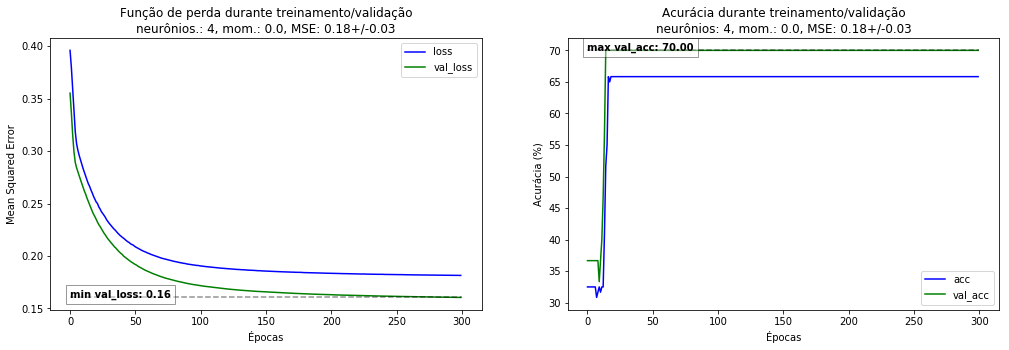

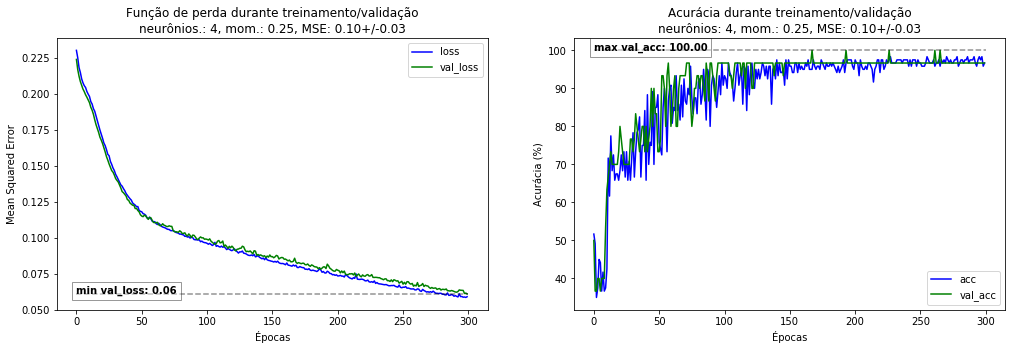

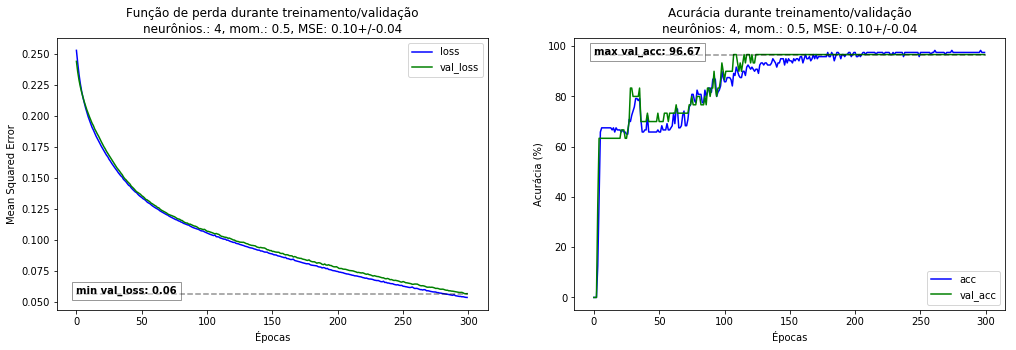

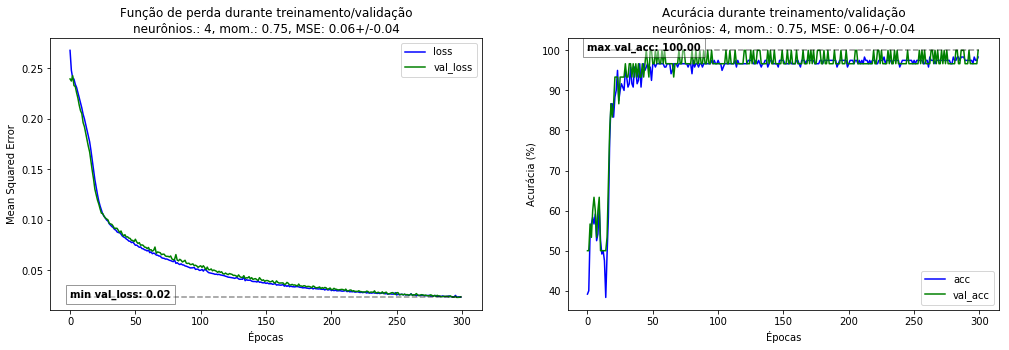

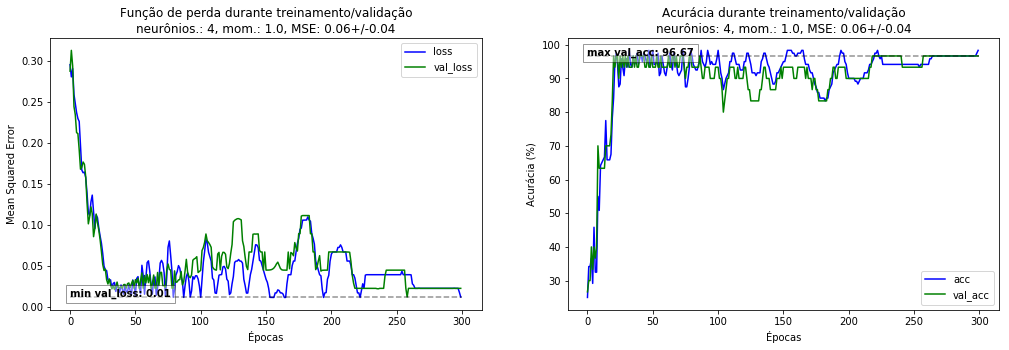

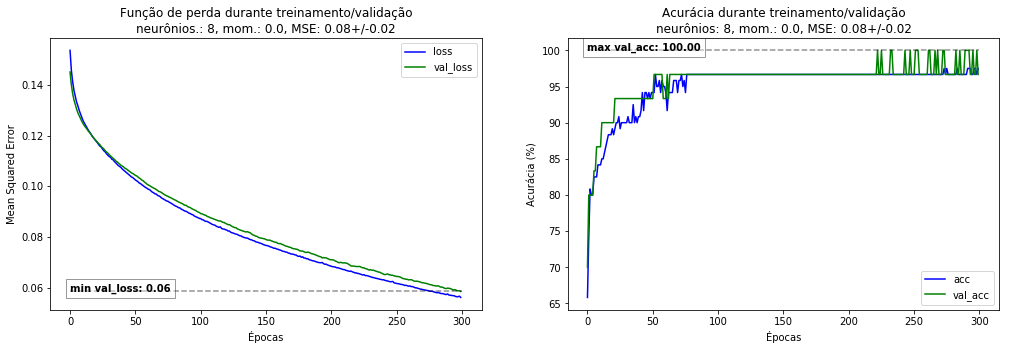

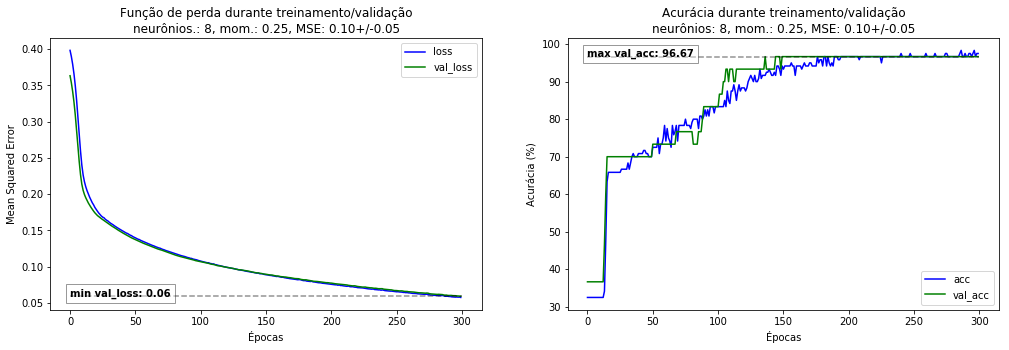

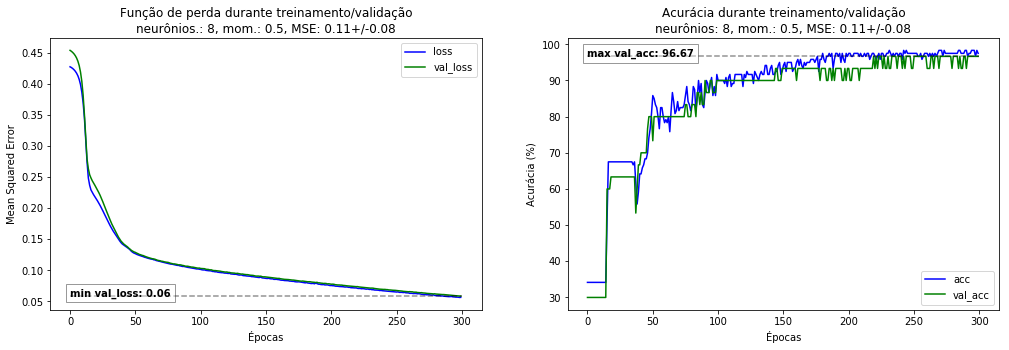

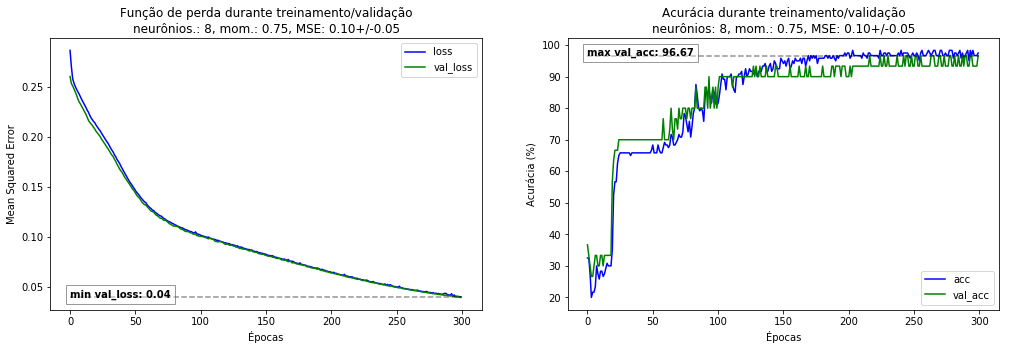

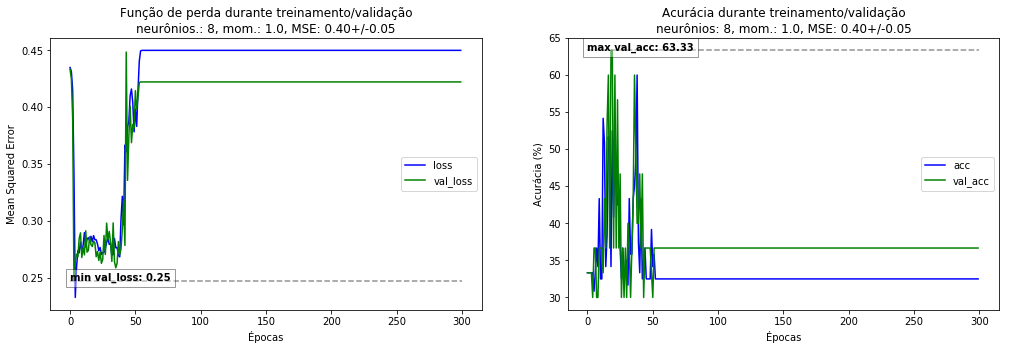

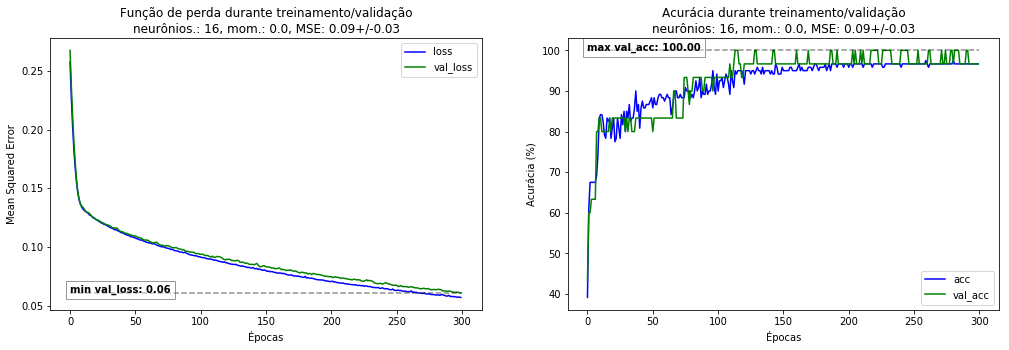

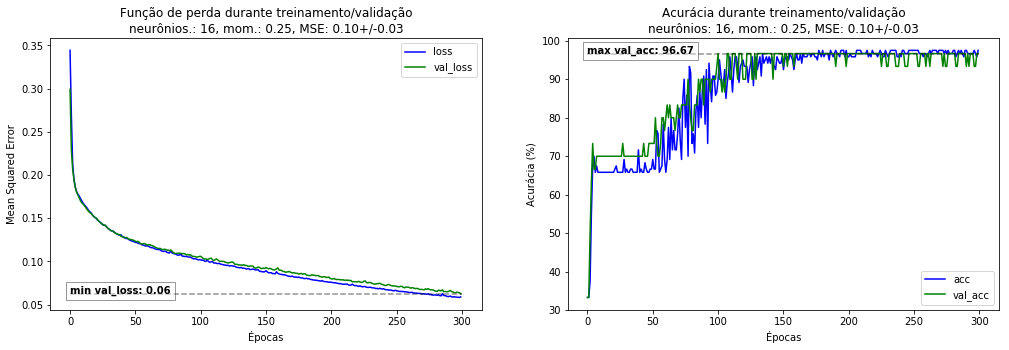

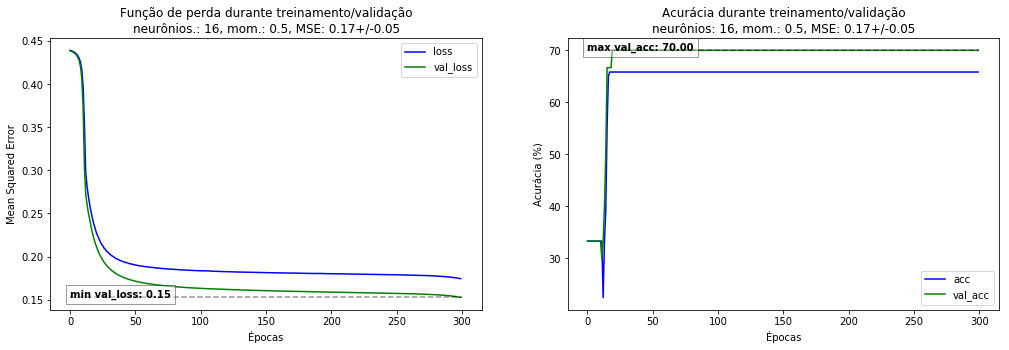

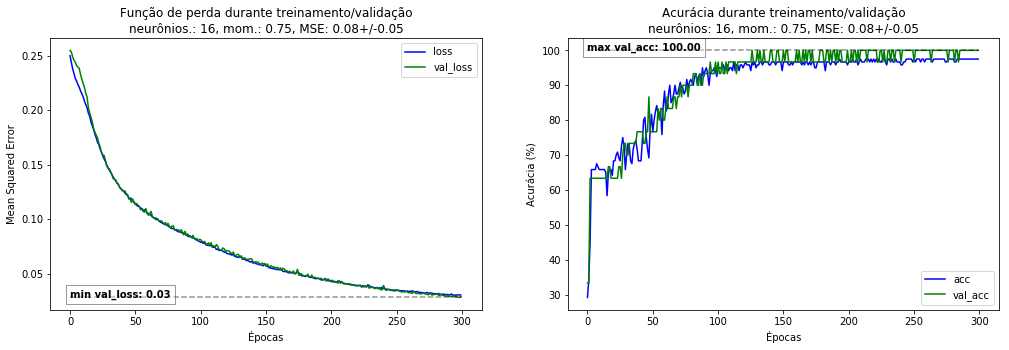

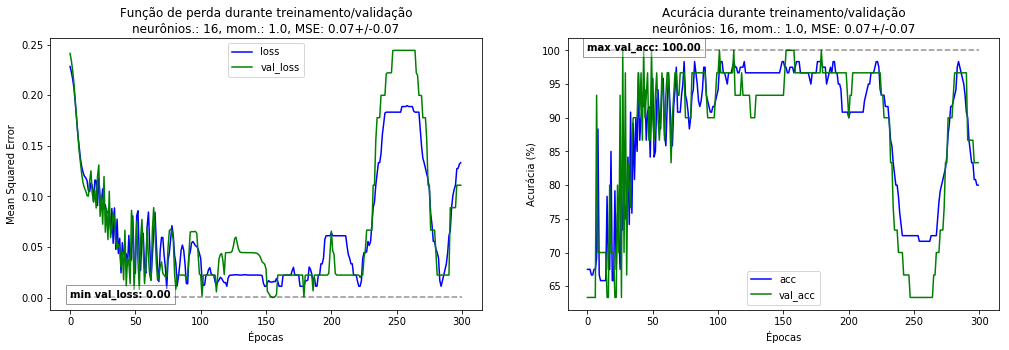

In [112]:
val_mse, mse = dict(), dict()
momentums = [0.0, 0.25, 0.5, 0.75, 1.0]
lr = 0.01
hidden_layers = [4, 8, 16]

for hl in hidden_layers:
    for mom in momentums:
        model = Sequential()
        model.add(Dense(units=16, activation='relu', input_dim=4))
        model.add(Dense(units=3, activation='softmax'))
        opt = optimizers.SGD(lr=lr, momentum=mom)
        model.compile(optimizer=opt, loss='mean_squared_error', metrics=['categorical_accuracy'])
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)

        loss, val_loss = np.array(history.history['loss']), np.array(history.history['val_loss'])
        acc, val_acc = np.array(history.history['categorical_accuracy'])*100, \
                       np.array(history.history['val_categorical_accuracy'])*100
        fig, ax = plt.subplots(1, 2, figsize=(17, 5))
        ax[0].plot(loss, label='loss', color='blue')
        ax[0].plot(val_loss, label='val_loss', color='green')
        ax[0].plot([0, len(val_loss)], [val_loss.min(), val_loss.min()], color='#0000006D', linestyle='--')
        ax[0].text(0, val_loss.min(), 'min val_loss: %.2f'%val_loss.min(), 
                  fontweight=1000, bbox=dict(facecolor='white', alpha=.4))
        ax[0].legend()
        ax[0].set_title('Função de perda durante treinamento/validação\nneurônios.: %s, mom.: %s, MSE: %.2f+/-%.2f'%(hl, mom, 
                                                                                                  val_loss.mean(), 
                                                                                                 val_loss.std()))
        ax[0].set_xlabel('Épocas')
        ax[0].set_ylabel('Mean Squared Error')
        ax[1].plot(acc, label='acc', color='blue')
        ax[1].plot(val_acc, label='val_acc', color='green')
        ax[1].plot([0, len(val_acc)], [val_acc.max(), val_acc.max()], color='#0000006D', linestyle='--')
        ax[1].text(0, val_acc.max(), 'max val_acc: %.2f'%val_acc.max(), 
                   fontweight=1000, bbox=dict(facecolor='white', alpha=.4))
        ax[1].legend()
        ax[1].set_title('Acurácia durante treinamento/validação\nneurônios: %s, mom.: %s, MSE: %.2f+/-%.2f'%(hl, mom, 
                                                                                                  val_loss.mean(), 
                                                                                                 val_loss.std()))
        ax[1].set_xlabel('Épocas')
        ax[1].set_ylabel('Acurácia (%)')
        print('filename: ', 'results/metrics_001_iris_lr%s_m%s.pdf'%(lr, mom))
        plt.savefig('results/metrics_001_iris_hl%s_lr%s_m%s.pdf'%(hl, lr, mom), dpi=600, bbox_inches='tight', 
                    transparent=False, pad_inches=0.1)
        if not val_mse.get(hl):
            val_mse[hl] = dict(mean=list(), std=list())
        if not mse.get(hl):
            mse[hl] = dict(mean=list(), std=list())
        val_mse[hl]['mean'].append(val_loss.mean())
        mse[hl]['mean'].append(loss.mean())
        val_mse[hl]['std'].append(val_loss.std())
        mse[hl]['std'].append(loss.std())
        

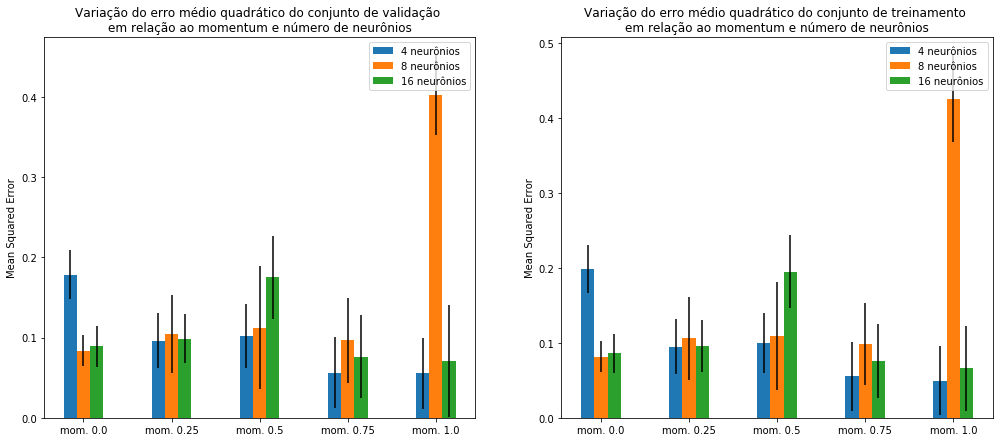

In [115]:
width = .15
x = np.arange(len(momentums))
fig, ax = plt.subplots(1, 2, figsize=(17, 7))
for key in val_mse.keys():
    ax[0].bar(x-width/2, val_mse[key]['mean'], width, yerr=val_mse[key]['std'], 
            label='%s neurônios'%key)
    x = x+width
ax[0].legend()
ax[0].set_xticks(x-(width*2.5))
ax[0].set_xticklabels(['mom. %s'%m for m in momentums] )
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_title('Variação do erro médio quadrático do conjunto de validação \nem relação ao momentum e número de neurônios')

width = .15
x = np.arange(len(momentums))
for key in mse.keys():
    ax[1].bar(x-width/2, mse[key]['mean'], width, yerr=mse[key]['std'], 
            label='%s neurônios'%key)
    x = x+width
ax[1].legend()
ax[1].set_xticks(x-(width*2.5))
ax[1].set_xticklabels(['mom. %s'%m for m in momentums] )
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_title('Variação do erro médio quadrático do conjunto de treinamento \nem relação ao momentum e número de neurônios')
plt.savefig('results/compare_metrics_001.pdf', dpi=600, bbox_inches='tight', 
                    transparent=False, pad_inches=0.1)

In [ ]:
mom = 0.5
alpha = 0.01

for hl in [4, 8, 16]:
    model = Sequential()
    model.add(Dense(units=hl, activation='relu', input_dim=4))
    model.add(Dense(units=3, activation='softmax'))
    opt = optimizers.SGD(lr=lr, momentum=mom)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['categorical_accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)

    loss, val_loss = np.array(history.history['loss']), np.array(history.history['val_loss'])
    fig, ax = plt.subplots(1, 2, figsize=(17, 5))
    ax[0].plot(loss, label='loss', color='blue')
    ax[0].plot(val_loss, label='val_loss', color='green')
    ax[0].plot([0, len(val_loss)], [val_loss.min(), val_loss.min()], color='#0000006D', linestyle='--')
    ax[0].text(0, val_loss.min(), 'min val_loss: %.2f'%val_loss.min(), 
              fontweight=1000, bbox=dict(facecolor='white', alpha=.4))
    ax[0].legend()
    ax[0].set_title('Sem L2\nneurônios: %s, mom.: %s'%(hl, mom))


    model = Sequential()
    model.add(Dense(units=hl, kernel_regularizer=l2(alpha), activity_regularizer=l2(alpha),
                    activation='relu', input_dim=4))
    model.add(Dense(units=3, activation='softmax'))
    opt = optimizers.SGD(lr=lr, momentum=mom)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['categorical_accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)

    loss, val_loss = np.array(history.history['loss']), np.array(history.history['val_loss'])
    ax[1].plot(loss, label='loss', color='blue')
    ax[1].plot(val_loss, label='val_loss', color='green')
    ax[1].plot([0, len(val_loss)], [val_loss.min(), val_loss.min()], color='#0000006D', linestyle='--')
    ax[1].text(0, val_loss.min(), 'min val_loss: %.2f'%val_loss.min(), 
              fontweight=1000, bbox=dict(facecolor='white', alpha=.4))
    ax[1].legend()
    ax[1].set_title('Sem L2 (alpha = %s)\nneurônios: %s, mom.: %s'%(alpha, hl, mom))

    plt.savefig('results/regularizer_hl%s_001_iris.pdf'%(hl), dpi=300, \
               bbox_inches='tight', transparent=False, pad_inches=0.1)

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 3s 27ms/step - loss: 0.3984 - categorical_accuracy: 0.3250 - val_loss: 0.3630 - val_categorical_accuracy: 0.3667
Epoch 2/300
120/120 [==============================] - 0s 83us/step - loss: 0.3833 - categorical_accuracy: 0.3250 - val_loss: 0.3448 - val_categorical_accuracy: 0.3667
Epoch 3/300
120/120 [==============================] - 0s 166us/step - loss: 0.3601 - categorical_accuracy: 0.3250 - val_loss: 0.3183 - val_categorical_accuracy: 0.3667
Epoch 4/300
120/120 [==============================] - 0s 162us/step - loss: 0.3274 - categorical_accuracy: 0.3250 - val_loss: 0.2847 - val_categorical_accuracy: 0.3667
Epoch 5/300
120/120 [==============================] - 0s 237us/step - loss: 0.2914 - categorical_accuracy: 0.3250 - val_loss: 0.2565 - val_categorical_accuracy: 0.3667
Epoch 6/300
120/120 [==============================] - 0s 265us/step - loss: 0.2627 - categorical_accuracy: 0.32

Epoch 49/300
120/120 [==============================] - 0s 186us/step - loss: 0.1243 - categorical_accuracy: 0.9250 - val_loss: 0.1274 - val_categorical_accuracy: 0.9000
Epoch 50/300
120/120 [==============================] - 0s 205us/step - loss: 0.1232 - categorical_accuracy: 0.9167 - val_loss: 0.1263 - val_categorical_accuracy: 0.9000
Epoch 51/300
120/120 [==============================] - 0s 209us/step - loss: 0.1223 - categorical_accuracy: 0.9083 - val_loss: 0.1251 - val_categorical_accuracy: 0.9000
Epoch 52/300
120/120 [==============================] - 0s 203us/step - loss: 0.1212 - categorical_accuracy: 0.9250 - val_loss: 0.1242 - val_categorical_accuracy: 0.9000
Epoch 53/300
120/120 [==============================] - 0s 211us/step - loss: 0.1201 - categorical_accuracy: 0.9000 - val_loss: 0.1232 - val_categorical_accuracy: 0.9000
Epoch 54/300
120/120 [==============================] - 0s 185us/step - loss: 0.1191 - categorical_accuracy: 0.9250 - val_loss: 0.1220 - val_categoric

120/120 [==============================] - 0s 184us/step - loss: 0.0775 - categorical_accuracy: 0.9667 - val_loss: 0.0794 - val_categorical_accuracy: 0.9333
Epoch 146/300
120/120 [==============================] - 0s 170us/step - loss: 0.0772 - categorical_accuracy: 0.9667 - val_loss: 0.0792 - val_categorical_accuracy: 0.9333
Epoch 147/300
120/120 [==============================] - 0s 172us/step - loss: 0.0768 - categorical_accuracy: 0.9667 - val_loss: 0.0788 - val_categorical_accuracy: 0.9333
Epoch 148/300
120/120 [==============================] - 0s 134us/step - loss: 0.0768 - categorical_accuracy: 0.9667 - val_loss: 0.0786 - val_categorical_accuracy: 0.9333
Epoch 149/300
120/120 [==============================] - 0s 143us/step - loss: 0.0767 - categorical_accuracy: 0.9750 - val_loss: 0.0782 - val_categorical_accuracy: 0.9000
Epoch 150/300
120/120 [==============================] - 0s 146us/step - loss: 0.0761 - categorical_accuracy: 0.9750 - val_loss: 0.0778 - val_categorical_accur

Epoch 193/300
120/120 [==============================] - 0s 205us/step - loss: 0.0664 - categorical_accuracy: 0.9667 - val_loss: 0.0680 - val_categorical_accuracy: 0.9667
Epoch 194/300
120/120 [==============================] - 0s 172us/step - loss: 0.0661 - categorical_accuracy: 0.9750 - val_loss: 0.0678 - val_categorical_accuracy: 0.9667
Epoch 195/300
120/120 [==============================] - 0s 189us/step - loss: 0.0657 - categorical_accuracy: 0.9750 - val_loss: 0.0677 - val_categorical_accuracy: 0.9333
Epoch 196/300
120/120 [==============================] - 0s 202us/step - loss: 0.0657 - categorical_accuracy: 0.9750 - val_loss: 0.0676 - val_categorical_accuracy: 0.9333
Epoch 197/300
120/120 [==============================] - 0s 171us/step - loss: 0.0660 - categorical_accuracy: 0.9667 - val_loss: 0.0673 - val_categorical_accuracy: 0.9333
Epoch 198/300
120/120 [==============================] - 0s 220us/step - loss: 0.0653 - categorical_accuracy: 0.9750 - val_loss: 0.0669 - val_cat

Epoch 241/300
120/120 [==============================] - 0s 138us/step - loss: 0.0575 - categorical_accuracy: 0.9833 - val_loss: 0.0586 - val_categorical_accuracy: 0.9667
Epoch 242/300
120/120 [==============================] - 0s 126us/step - loss: 0.0568 - categorical_accuracy: 0.9667 - val_loss: 0.0588 - val_categorical_accuracy: 0.9333
Epoch 243/300
120/120 [==============================] - 0s 201us/step - loss: 0.0567 - categorical_accuracy: 0.9833 - val_loss: 0.0583 - val_categorical_accuracy: 0.9667
Epoch 244/300
120/120 [==============================] - 0s 240us/step - loss: 0.0566 - categorical_accuracy: 0.9750 - val_loss: 0.0581 - val_categorical_accuracy: 0.9667
Epoch 245/300
120/120 [==============================] - 0s 192us/step - loss: 0.0564 - categorical_accuracy: 0.9750 - val_loss: 0.0579 - val_categorical_accuracy: 0.9667
Epoch 246/300
120/120 [==============================] - 0s 152us/step - loss: 0.0564 - categorical_accuracy: 0.9833 - val_loss: 0.0578 - val_cat

Epoch 289/300
120/120 [==============================] - 0s 251us/step - loss: 0.0498 - categorical_accuracy: 0.9833 - val_loss: 0.0507 - val_categorical_accuracy: 0.9667
Epoch 290/300
120/120 [==============================] - 0s 254us/step - loss: 0.0496 - categorical_accuracy: 0.9833 - val_loss: 0.0506 - val_categorical_accuracy: 0.9667
Epoch 291/300
120/120 [==============================] - 0s 188us/step - loss: 0.0493 - categorical_accuracy: 0.9833 - val_loss: 0.0505 - val_categorical_accuracy: 0.9667
Epoch 292/300
120/120 [==============================] - 0s 165us/step - loss: 0.0494 - categorical_accuracy: 0.9750 - val_loss: 0.0504 - val_categorical_accuracy: 0.9667
Epoch 293/300
120/120 [==============================] - 0s 149us/step - loss: 0.0488 - categorical_accuracy: 0.9833 - val_loss: 0.0501 - val_categorical_accuracy: 0.9667
Epoch 294/300
120/120 [==============================] - 0s 214us/step - loss: 0.0488 - categorical_accuracy: 0.9833 - val_loss: 0.0500 - val_cat

Epoch 37/300
120/120 [==============================] - 0s 191us/step - loss: 0.2457 - categorical_accuracy: 0.3417 - val_loss: 0.2458 - val_categorical_accuracy: 0.3000
Epoch 38/300
120/120 [==============================] - 0s 191us/step - loss: 0.2457 - categorical_accuracy: 0.3417 - val_loss: 0.2457 - val_categorical_accuracy: 0.3000
Epoch 39/300
120/120 [==============================] - 0s 182us/step - loss: 0.2456 - categorical_accuracy: 0.3417 - val_loss: 0.2457 - val_categorical_accuracy: 0.3000
Epoch 40/300
120/120 [==============================] - 0s 152us/step - loss: 0.2455 - categorical_accuracy: 0.3417 - val_loss: 0.2456 - val_categorical_accuracy: 0.3000
Epoch 41/300
120/120 [==============================] - 0s 174us/step - loss: 0.2454 - categorical_accuracy: 0.3417 - val_loss: 0.2455 - val_categorical_accuracy: 0.3000
Epoch 42/300
120/120 [==============================] - 0s 140us/step - loss: 0.2454 - categorical_accuracy: 0.3417 - val_loss: 0.2455 - val_categoric

120/120 [==============================] - 0s 211us/step - loss: 0.2395 - categorical_accuracy: 0.3417 - val_loss: 0.2397 - val_categorical_accuracy: 0.3000
Epoch 134/300
120/120 [==============================] - 0s 150us/step - loss: 0.2394 - categorical_accuracy: 0.3417 - val_loss: 0.2397 - val_categorical_accuracy: 0.3000
Epoch 135/300
120/120 [==============================] - 0s 157us/step - loss: 0.2394 - categorical_accuracy: 0.3417 - val_loss: 0.2396 - val_categorical_accuracy: 0.3000
Epoch 136/300
120/120 [==============================] - 0s 237us/step - loss: 0.2393 - categorical_accuracy: 0.3417 - val_loss: 0.2396 - val_categorical_accuracy: 0.3000
Epoch 137/300
120/120 [==============================] - 0s 230us/step - loss: 0.2393 - categorical_accuracy: 0.3417 - val_loss: 0.2395 - val_categorical_accuracy: 0.3000
Epoch 138/300
120/120 [==============================] - 0s 173us/step - loss: 0.2392 - categorical_accuracy: 0.3417 - val_loss: 0.2395 - val_categorical_accur

Epoch 181/300
120/120 [==============================] - 0s 199us/step - loss: 0.2370 - categorical_accuracy: 0.3417 - val_loss: 0.2373 - val_categorical_accuracy: 0.3000
Epoch 182/300
120/120 [==============================] - 0s 205us/step - loss: 0.2370 - categorical_accuracy: 0.3417 - val_loss: 0.2373 - val_categorical_accuracy: 0.3000
Epoch 183/300
120/120 [==============================] - 0s 202us/step - loss: 0.2369 - categorical_accuracy: 0.3417 - val_loss: 0.2372 - val_categorical_accuracy: 0.3000
Epoch 184/300
120/120 [==============================] - 0s 203us/step - loss: 0.2369 - categorical_accuracy: 0.3417 - val_loss: 0.2372 - val_categorical_accuracy: 0.3000
Epoch 185/300
120/120 [==============================] - 0s 217us/step - loss: 0.2368 - categorical_accuracy: 0.3417 - val_loss: 0.2371 - val_categorical_accuracy: 0.3000
Epoch 186/300
120/120 [==============================] - 0s 164us/step - loss: 0.2368 - categorical_accuracy: 0.3417 - val_loss: 0.2371 - val_cat

Epoch 229/300
120/120 [==============================] - 0s 141us/step - loss: 0.2349 - categorical_accuracy: 0.3417 - val_loss: 0.2352 - val_categorical_accuracy: 0.3000
Epoch 230/300
120/120 [==============================] - 0s 139us/step - loss: 0.2349 - categorical_accuracy: 0.3417 - val_loss: 0.2352 - val_categorical_accuracy: 0.3000
Epoch 231/300
120/120 [==============================] - 0s 116us/step - loss: 0.2348 - categorical_accuracy: 0.3417 - val_loss: 0.2351 - val_categorical_accuracy: 0.3000
Epoch 232/300
120/120 [==============================] - 0s 140us/step - loss: 0.2348 - categorical_accuracy: 0.3417 - val_loss: 0.2351 - val_categorical_accuracy: 0.3000
Epoch 233/300
120/120 [==============================] - 0s 125us/step - loss: 0.2348 - categorical_accuracy: 0.3417 - val_loss: 0.2351 - val_categorical_accuracy: 0.3000
Epoch 234/300
120/120 [==============================] - 0s 128us/step - loss: 0.2347 - categorical_accuracy: 0.3417 - val_loss: 0.2350 - val_cat

Epoch 277/300
120/120 [==============================] - 0s 153us/step - loss: 0.2331 - categorical_accuracy: 0.3417 - val_loss: 0.2335 - val_categorical_accuracy: 0.3000
Epoch 278/300
120/120 [==============================] - 0s 134us/step - loss: 0.2331 - categorical_accuracy: 0.3417 - val_loss: 0.2334 - val_categorical_accuracy: 0.3000
Epoch 279/300
120/120 [==============================] - 0s 171us/step - loss: 0.2330 - categorical_accuracy: 0.3417 - val_loss: 0.2334 - val_categorical_accuracy: 0.3000
Epoch 280/300
120/120 [==============================] - 0s 138us/step - loss: 0.2330 - categorical_accuracy: 0.3417 - val_loss: 0.2333 - val_categorical_accuracy: 0.3000
Epoch 281/300
120/120 [==============================] - 0s 149us/step - loss: 0.2330 - categorical_accuracy: 0.3417 - val_loss: 0.2333 - val_categorical_accuracy: 0.3000
Epoch 282/300
120/120 [==============================] - 0s 152us/step - loss: 0.2329 - categorical_accuracy: 0.3417 - val_loss: 0.2333 - val_cat

Epoch 25/300
120/120 [==============================] - 0s 158us/step - loss: 0.1164 - categorical_accuracy: 0.8083 - val_loss: 0.1196 - val_categorical_accuracy: 0.9000
Epoch 26/300
120/120 [==============================] - 0s 171us/step - loss: 0.1150 - categorical_accuracy: 0.9333 - val_loss: 0.1195 - val_categorical_accuracy: 0.9000
Epoch 27/300
120/120 [==============================] - 0s 129us/step - loss: 0.1143 - categorical_accuracy: 0.9000 - val_loss: 0.1177 - val_categorical_accuracy: 0.9000
Epoch 28/300
120/120 [==============================] - 0s 113us/step - loss: 0.1129 - categorical_accuracy: 0.9500 - val_loss: 0.1174 - val_categorical_accuracy: 0.9000
Epoch 29/300
120/120 [==============================] - 0s 115us/step - loss: 0.1123 - categorical_accuracy: 0.8500 - val_loss: 0.1152 - val_categorical_accuracy: 0.9000
Epoch 30/300
120/120 [==============================] - 0s 137us/step - loss: 0.1100 - categorical_accuracy: 0.9333 - val_loss: 0.1153 - val_categoric

120/120 [==============================] - 0s 133us/step - loss: 0.0683 - categorical_accuracy: 0.9750 - val_loss: 0.0748 - val_categorical_accuracy: 0.9667
Epoch 122/300
120/120 [==============================] - 0s 149us/step - loss: 0.0680 - categorical_accuracy: 0.9750 - val_loss: 0.0752 - val_categorical_accuracy: 0.9667
Epoch 123/300
120/120 [==============================] - 0s 182us/step - loss: 0.0678 - categorical_accuracy: 0.9750 - val_loss: 0.0746 - val_categorical_accuracy: 0.9667
Epoch 124/300
120/120 [==============================] - 0s 189us/step - loss: 0.0673 - categorical_accuracy: 0.9750 - val_loss: 0.0751 - val_categorical_accuracy: 0.9667
Epoch 125/300
120/120 [==============================] - 0s 161us/step - loss: 0.0670 - categorical_accuracy: 0.9667 - val_loss: 0.0749 - val_categorical_accuracy: 0.9667
Epoch 126/300
120/120 [==============================] - 0s 165us/step - loss: 0.0669 - categorical_accuracy: 0.9667 - val_loss: 0.0733 - val_categorical_accur

Epoch 169/300
120/120 [==============================] - 0s 159us/step - loss: 0.0571 - categorical_accuracy: 0.9667 - val_loss: 0.0638 - val_categorical_accuracy: 0.9667
Epoch 170/300
120/120 [==============================] - 0s 204us/step - loss: 0.0567 - categorical_accuracy: 0.9750 - val_loss: 0.0632 - val_categorical_accuracy: 0.9667
Epoch 171/300
120/120 [==============================] - 0s 195us/step - loss: 0.0562 - categorical_accuracy: 0.9750 - val_loss: 0.0636 - val_categorical_accuracy: 0.9667
Epoch 172/300
120/120 [==============================] - 0s 214us/step - loss: 0.0561 - categorical_accuracy: 0.9750 - val_loss: 0.0631 - val_categorical_accuracy: 0.9667
Epoch 173/300
120/120 [==============================] - 0s 185us/step - loss: 0.0561 - categorical_accuracy: 0.9750 - val_loss: 0.0634 - val_categorical_accuracy: 0.9667
Epoch 174/300
120/120 [==============================] - 0s 152us/step - loss: 0.0556 - categorical_accuracy: 0.9667 - val_loss: 0.0632 - val_cat

Epoch 217/300
120/120 [==============================] - 0s 144us/step - loss: 0.0487 - categorical_accuracy: 0.9750 - val_loss: 0.0549 - val_categorical_accuracy: 0.9667
Epoch 218/300
120/120 [==============================] - 0s 149us/step - loss: 0.0480 - categorical_accuracy: 0.9667 - val_loss: 0.0554 - val_categorical_accuracy: 0.9667
Epoch 219/300
120/120 [==============================] - 0s 108us/step - loss: 0.0487 - categorical_accuracy: 0.9667 - val_loss: 0.0544 - val_categorical_accuracy: 0.9667
Epoch 220/300
120/120 [==============================] - 0s 134us/step - loss: 0.0477 - categorical_accuracy: 0.9750 - val_loss: 0.0539 - val_categorical_accuracy: 0.9667
Epoch 221/300
120/120 [==============================] - 0s 157us/step - loss: 0.0484 - categorical_accuracy: 0.9667 - val_loss: 0.0538 - val_categorical_accuracy: 0.9667
Epoch 222/300
120/120 [==============================] - 0s 138us/step - loss: 0.0478 - categorical_accuracy: 0.9750 - val_loss: 0.0536 - val_cat

Epoch 265/300
120/120 [==============================] - 0s 138us/step - loss: 0.0420 - categorical_accuracy: 0.9667 - val_loss: 0.0480 - val_categorical_accuracy: 0.9667
Epoch 266/300
120/120 [==============================] - 0s 161us/step - loss: 0.0419 - categorical_accuracy: 0.9667 - val_loss: 0.0477 - val_categorical_accuracy: 0.9667
Epoch 267/300
120/120 [==============================] - 0s 134us/step - loss: 0.0416 - categorical_accuracy: 0.9750 - val_loss: 0.0478 - val_categorical_accuracy: 0.9667
Epoch 268/300
120/120 [==============================] - 0s 143us/step - loss: 0.0418 - categorical_accuracy: 0.9667 - val_loss: 0.0476 - val_categorical_accuracy: 0.9667
Epoch 269/300
120/120 [==============================] - 0s 142us/step - loss: 0.0416 - categorical_accuracy: 0.9750 - val_loss: 0.0470 - val_categorical_accuracy: 0.9667
Epoch 270/300
120/120 [==============================] - 0s 133us/step - loss: 0.0413 - categorical_accuracy: 0.9750 - val_loss: 0.0470 - val_cat

Epoch 13/300
120/120 [==============================] - 0s 153us/step - loss: 0.2707 - categorical_accuracy: 0.3667 - val_loss: 0.2719 - val_categorical_accuracy: 0.3333
Epoch 14/300
120/120 [==============================] - 0s 159us/step - loss: 0.2706 - categorical_accuracy: 0.3667 - val_loss: 0.2717 - val_categorical_accuracy: 0.3333
Epoch 15/300
120/120 [==============================] - 0s 130us/step - loss: 0.2703 - categorical_accuracy: 0.3667 - val_loss: 0.2716 - val_categorical_accuracy: 0.3333
Epoch 16/300
120/120 [==============================] - 0s 135us/step - loss: 0.2701 - categorical_accuracy: 0.3750 - val_loss: 0.2714 - val_categorical_accuracy: 0.3333
Epoch 17/300
120/120 [==============================] - 0s 157us/step - loss: 0.2700 - categorical_accuracy: 0.3833 - val_loss: 0.2712 - val_categorical_accuracy: 0.3333
Epoch 18/300
120/120 [==============================] - 0s 154us/step - loss: 0.2697 - categorical_accuracy: 0.3833 - val_loss: 0.2711 - val_categoric

120/120 [==============================] - 0s 191us/step - loss: 0.2570 - categorical_accuracy: 0.4750 - val_loss: 0.2585 - val_categorical_accuracy: 0.4333
Epoch 110/300
120/120 [==============================] - 0s 205us/step - loss: 0.2568 - categorical_accuracy: 0.4667 - val_loss: 0.2584 - val_categorical_accuracy: 0.4333
Epoch 111/300
120/120 [==============================] - 0s 153us/step - loss: 0.2567 - categorical_accuracy: 0.4750 - val_loss: 0.2583 - val_categorical_accuracy: 0.4333
Epoch 112/300
120/120 [==============================] - 0s 165us/step - loss: 0.2566 - categorical_accuracy: 0.4750 - val_loss: 0.2581 - val_categorical_accuracy: 0.4333
Epoch 113/300
120/120 [==============================] - 0s 183us/step - loss: 0.2565 - categorical_accuracy: 0.4750 - val_loss: 0.2580 - val_categorical_accuracy: 0.4333
Epoch 114/300
120/120 [==============================] - 0s 156us/step - loss: 0.2563 - categorical_accuracy: 0.4750 - val_loss: 0.2579 - val_categorical_accur

Epoch 157/300
120/120 [==============================] - 0s 198us/step - loss: 0.2517 - categorical_accuracy: 0.4750 - val_loss: 0.2532 - val_categorical_accuracy: 0.4333
Epoch 158/300
120/120 [==============================] - 0s 176us/step - loss: 0.2516 - categorical_accuracy: 0.4750 - val_loss: 0.2531 - val_categorical_accuracy: 0.4333
Epoch 159/300
120/120 [==============================] - 0s 184us/step - loss: 0.2514 - categorical_accuracy: 0.4750 - val_loss: 0.2530 - val_categorical_accuracy: 0.4333
Epoch 160/300
120/120 [==============================] - 0s 174us/step - loss: 0.2514 - categorical_accuracy: 0.4833 - val_loss: 0.2529 - val_categorical_accuracy: 0.4333
Epoch 161/300
120/120 [==============================] - 0s 162us/step - loss: 0.2512 - categorical_accuracy: 0.4750 - val_loss: 0.2528 - val_categorical_accuracy: 0.4333
Epoch 162/300
120/120 [==============================] - 0s 184us/step - loss: 0.2510 - categorical_accuracy: 0.4750 - val_loss: 0.2527 - val_cat

Epoch 205/300
120/120 [==============================] - 0s 138us/step - loss: 0.2471 - categorical_accuracy: 0.4833 - val_loss: 0.2487 - val_categorical_accuracy: 0.4333
Epoch 206/300
120/120 [==============================] - 0s 142us/step - loss: 0.2471 - categorical_accuracy: 0.4833 - val_loss: 0.2486 - val_categorical_accuracy: 0.4333
Epoch 207/300
120/120 [==============================] - 0s 155us/step - loss: 0.2469 - categorical_accuracy: 0.4750 - val_loss: 0.2485 - val_categorical_accuracy: 0.4333
Epoch 208/300
120/120 [==============================] - 0s 151us/step - loss: 0.2470 - categorical_accuracy: 0.4833 - val_loss: 0.2484 - val_categorical_accuracy: 0.4333
Epoch 209/300
120/120 [==============================] - 0s 175us/step - loss: 0.2468 - categorical_accuracy: 0.4750 - val_loss: 0.2483 - val_categorical_accuracy: 0.4333
Epoch 210/300
120/120 [==============================] - 0s 160us/step - loss: 0.2468 - categorical_accuracy: 0.4750 - val_loss: 0.2482 - val_cat

Epoch 253/300
120/120 [==============================] - 0s 134us/step - loss: 0.2430 - categorical_accuracy: 0.5250 - val_loss: 0.2438 - val_categorical_accuracy: 0.5333
Epoch 254/300
120/120 [==============================] - 0s 132us/step - loss: 0.2429 - categorical_accuracy: 0.5500 - val_loss: 0.2437 - val_categorical_accuracy: 0.5333
Epoch 255/300
120/120 [==============================] - 0s 132us/step - loss: 0.2430 - categorical_accuracy: 0.5583 - val_loss: 0.2436 - val_categorical_accuracy: 0.5333
Epoch 256/300
120/120 [==============================] - 0s 138us/step - loss: 0.2427 - categorical_accuracy: 0.5500 - val_loss: 0.2436 - val_categorical_accuracy: 0.5333
Epoch 257/300
120/120 [==============================] - 0s 140us/step - loss: 0.2428 - categorical_accuracy: 0.5500 - val_loss: 0.2435 - val_categorical_accuracy: 0.5333
Epoch 258/300
120/120 [==============================] - 0s 139us/step - loss: 0.2427 - categorical_accuracy: 0.5333 - val_loss: 0.2435 - val_cat

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 3s 24ms/step - loss: 0.4200 - categorical_accuracy: 0.3417 - val_loss: 0.4477 - val_categorical_accuracy: 0.3000
Epoch 2/300
120/120 [==============================] - 0s 115us/step - loss: 0.4168 - categorical_accuracy: 0.3417 - val_loss: 0.4439 - val_categorical_accuracy: 0.3000
Epoch 3/300
120/120 [==============================] - 0s 109us/step - loss: 0.4123 - categorical_accuracy: 0.3417 - val_loss: 0.4387 - val_categorical_accuracy: 0.3000
Epoch 4/300
120/120 [==============================] - 0s 169us/step - loss: 0.4061 - categorical_accuracy: 0.3417 - val_loss: 0.4318 - val_categorical_accuracy: 0.3000
Epoch 5/300
120/120 [==============================] - 0s 162us/step - loss: 0.3981 - categorical_accuracy: 0.3417 - val_loss: 0.4226 - val_categorical_accuracy: 0.3000
Epoch 6/300
120/120 [==============================] - 0s 195us/step - loss: 0.3877 - categorical_accuracy: 0.3

Epoch 49/300
120/120 [==============================] - 0s 181us/step - loss: 0.2617 - categorical_accuracy: 0.5333 - val_loss: 0.2623 - val_categorical_accuracy: 0.5333
Epoch 50/300
120/120 [==============================] - 0s 184us/step - loss: 0.2617 - categorical_accuracy: 0.5000 - val_loss: 0.2622 - val_categorical_accuracy: 0.5333
Epoch 51/300
120/120 [==============================] - 0s 137us/step - loss: 0.2620 - categorical_accuracy: 0.5750 - val_loss: 0.2615 - val_categorical_accuracy: 0.5333
Epoch 52/300
120/120 [==============================] - 0s 135us/step - loss: 0.2619 - categorical_accuracy: 0.5083 - val_loss: 0.2608 - val_categorical_accuracy: 0.5000
Epoch 53/300
120/120 [==============================] - 0s 139us/step - loss: 0.2615 - categorical_accuracy: 0.5333 - val_loss: 0.2614 - val_categorical_accuracy: 0.5333
Epoch 54/300
120/120 [==============================] - 0s 165us/step - loss: 0.2610 - categorical_accuracy: 0.5083 - val_loss: 0.2614 - val_categoric

Epoch 145/300
120/120 [==============================] - 0s 253us/step - loss: 0.2441 - categorical_accuracy: 0.6333 - val_loss: 0.2461 - val_categorical_accuracy: 0.6333
Epoch 146/300
120/120 [==============================] - 0s 122us/step - loss: 0.2439 - categorical_accuracy: 0.6167 - val_loss: 0.2460 - val_categorical_accuracy: 0.6333
Epoch 147/300
120/120 [==============================] - 0s 162us/step - loss: 0.2440 - categorical_accuracy: 0.6167 - val_loss: 0.2458 - val_categorical_accuracy: 0.6333
Epoch 148/300
120/120 [==============================] - 0s 166us/step - loss: 0.2450 - categorical_accuracy: 0.5917 - val_loss: 0.2453 - val_categorical_accuracy: 0.6333
Epoch 149/300
120/120 [==============================] - 0s 196us/step - loss: 0.2443 - categorical_accuracy: 0.6167 - val_loss: 0.2468 - val_categorical_accuracy: 0.6333
Epoch 150/300
120/120 [==============================] - 0s 186us/step - loss: 0.2442 - categorical_accuracy: 0.6250 - val_loss: 0.2464 - val_cat

Epoch 193/300
120/120 [==============================] - 0s 190us/step - loss: 0.2372 - categorical_accuracy: 0.6333 - val_loss: 0.2407 - val_categorical_accuracy: 0.6000
Epoch 194/300
120/120 [==============================] - 0s 181us/step - loss: 0.2368 - categorical_accuracy: 0.6333 - val_loss: 0.2409 - val_categorical_accuracy: 0.6000
Epoch 195/300
120/120 [==============================] - 0s 212us/step - loss: 0.2366 - categorical_accuracy: 0.6250 - val_loss: 0.2406 - val_categorical_accuracy: 0.6000
Epoch 196/300
120/120 [==============================] - 0s 171us/step - loss: 0.2367 - categorical_accuracy: 0.6250 - val_loss: 0.2394 - val_categorical_accuracy: 0.6333
Epoch 197/300
120/120 [==============================] - 0s 192us/step - loss: 0.2368 - categorical_accuracy: 0.6167 - val_loss: 0.2394 - val_categorical_accuracy: 0.6333
Epoch 198/300
120/120 [==============================] - 0s 216us/step - loss: 0.2363 - categorical_accuracy: 0.6333 - val_loss: 0.2398 - val_cat

Epoch 241/300
120/120 [==============================] - 0s 149us/step - loss: 0.2300 - categorical_accuracy: 0.6333 - val_loss: 0.2352 - val_categorical_accuracy: 0.6333
Epoch 242/300
120/120 [==============================] - 0s 173us/step - loss: 0.2299 - categorical_accuracy: 0.6250 - val_loss: 0.2342 - val_categorical_accuracy: 0.6000
Epoch 243/300
120/120 [==============================] - 0s 147us/step - loss: 0.2303 - categorical_accuracy: 0.6167 - val_loss: 0.2341 - val_categorical_accuracy: 0.6000
Epoch 244/300
120/120 [==============================] - 0s 168us/step - loss: 0.2294 - categorical_accuracy: 0.6417 - val_loss: 0.2337 - val_categorical_accuracy: 0.6000
Epoch 245/300
120/120 [==============================] - 0s 190us/step - loss: 0.2291 - categorical_accuracy: 0.6250 - val_loss: 0.2331 - val_categorical_accuracy: 0.6000
Epoch 246/300
120/120 [==============================] - 0s 194us/step - loss: 0.2291 - categorical_accuracy: 0.6333 - val_loss: 0.2332 - val_cat

Epoch 289/300
120/120 [==============================] - 0s 169us/step - loss: 0.2234 - categorical_accuracy: 0.6333 - val_loss: 0.2272 - val_categorical_accuracy: 0.6000
Epoch 290/300
120/120 [==============================] - 0s 175us/step - loss: 0.2242 - categorical_accuracy: 0.6250 - val_loss: 0.2270 - val_categorical_accuracy: 0.6000
Epoch 291/300
120/120 [==============================] - 0s 127us/step - loss: 0.2230 - categorical_accuracy: 0.6333 - val_loss: 0.2287 - val_categorical_accuracy: 0.6333
Epoch 292/300
120/120 [==============================] - 0s 143us/step - loss: 0.2237 - categorical_accuracy: 0.6417 - val_loss: 0.2279 - val_categorical_accuracy: 0.6000
Epoch 293/300
120/120 [==============================] - 0s 152us/step - loss: 0.2228 - categorical_accuracy: 0.6417 - val_loss: 0.2280 - val_categorical_accuracy: 0.6333
Epoch 294/300
120/120 [==============================] - 0s 170us/step - loss: 0.2227 - categorical_accuracy: 0.6250 - val_loss: 0.2272 - val_cat

Epoch 37/300
120/120 [==============================] - 0s 115us/step - loss: 0.2603 - categorical_accuracy: 0.6750 - val_loss: 0.2606 - val_categorical_accuracy: 0.6333
Epoch 38/300
120/120 [==============================] - 0s 160us/step - loss: 0.2601 - categorical_accuracy: 0.6750 - val_loss: 0.2605 - val_categorical_accuracy: 0.6333
Epoch 39/300
120/120 [==============================] - 0s 133us/step - loss: 0.2601 - categorical_accuracy: 0.6750 - val_loss: 0.2604 - val_categorical_accuracy: 0.6333
Epoch 40/300
120/120 [==============================] - 0s 151us/step - loss: 0.2598 - categorical_accuracy: 0.6750 - val_loss: 0.2602 - val_categorical_accuracy: 0.6333
Epoch 41/300
120/120 [==============================] - 0s 140us/step - loss: 0.2597 - categorical_accuracy: 0.6750 - val_loss: 0.2601 - val_categorical_accuracy: 0.6333
Epoch 42/300
120/120 [==============================] - 0s 139us/step - loss: 0.2595 - categorical_accuracy: 0.6750 - val_loss: 0.2599 - val_categoric

120/120 [==============================] - 0s 128us/step - loss: 0.2482 - categorical_accuracy: 0.6750 - val_loss: 0.2488 - val_categorical_accuracy: 0.6333
Epoch 134/300
120/120 [==============================] - 0s 125us/step - loss: 0.2481 - categorical_accuracy: 0.6750 - val_loss: 0.2486 - val_categorical_accuracy: 0.6333
Epoch 135/300
120/120 [==============================] - 0s 130us/step - loss: 0.2481 - categorical_accuracy: 0.6750 - val_loss: 0.2485 - val_categorical_accuracy: 0.6333
Epoch 136/300
120/120 [==============================] - 0s 130us/step - loss: 0.2480 - categorical_accuracy: 0.6750 - val_loss: 0.2484 - val_categorical_accuracy: 0.6333
Epoch 137/300
120/120 [==============================] - 0s 131us/step - loss: 0.2479 - categorical_accuracy: 0.6750 - val_loss: 0.2484 - val_categorical_accuracy: 0.6333
Epoch 138/300
120/120 [==============================] - 0s 131us/step - loss: 0.2478 - categorical_accuracy: 0.6750 - val_loss: 0.2483 - val_categorical_accur

Epoch 181/300
120/120 [==============================] - 0s 207us/step - loss: 0.2435 - categorical_accuracy: 0.6750 - val_loss: 0.2439 - val_categorical_accuracy: 0.6333
Epoch 182/300
120/120 [==============================] - 0s 193us/step - loss: 0.2434 - categorical_accuracy: 0.6750 - val_loss: 0.2438 - val_categorical_accuracy: 0.6333
Epoch 183/300
120/120 [==============================] - 0s 206us/step - loss: 0.2433 - categorical_accuracy: 0.6750 - val_loss: 0.2437 - val_categorical_accuracy: 0.6333
Epoch 184/300
120/120 [==============================] - 0s 206us/step - loss: 0.2430 - categorical_accuracy: 0.6750 - val_loss: 0.2436 - val_categorical_accuracy: 0.6333
Epoch 185/300
120/120 [==============================] - 0s 221us/step - loss: 0.2430 - categorical_accuracy: 0.6750 - val_loss: 0.2435 - val_categorical_accuracy: 0.6333
Epoch 186/300
120/120 [==============================] - 0s 181us/step - loss: 0.2429 - categorical_accuracy: 0.6750 - val_loss: 0.2434 - val_cat

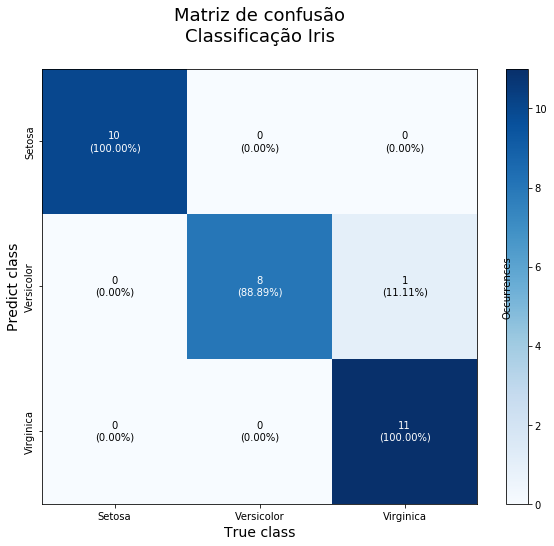

In [54]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
figsize = (15, 8)
fig, ax = plt.subplots(1, 1, figsize=figsize)

cmap = plt.cm.Blues
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.4)

total_samples = cm.sum(axis=1)[:, np.newaxis]
normed_conf_mat = cm.astype('float') / total_samples
labels = ['Setosa', 'Versicolor', 'Virginica']
label_font = dict(fontweight='normal', size=14)
title_font = dict(fontweight='normal', size=18)

matshow = ax.matshow(cm, cmap=cmap)
cb = plt.colorbar(matshow, cax=cax, orientation='vertical')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cell_text = str(cm[i, j])
        cell_text += '\n(%.2f%%)' % (normed_conf_mat[i, j] * 100)
        ax.text(x=j,
                y=i,
                s=cell_text,
                va='center',
                ha='center',
                color="white" if normed_conf_mat[i, j] > 0.5 else "black")

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels, rotation=90, va='center')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     ax.set_title('Matriz de confusão para %d testes'%((n*2)*0.2), fontdict=title_font)
ax.set_xlabel('True class', fontdict=label_font)
ax.set_ylabel('Predict class', fontdict=label_font)
cb.ax.set_ylabel('Occurrences', va='center', rotation=-270, labelpad=-40)
ax.set_title('Matriz de confusão\nClassificação Iris', fontdict=title_font)

plt.savefig('results/confusion_matrix_001_iris.pdf', dpi=300, \
           bbox_inches='tight', transparent=False, pad_inches=0.1)
plt.show()